***Data Visualization and K-means clustering project for datasets on number of hospital beds all over the world currently available during CoVid-19 pandemic***


Clustering algorithm is applied so that we can visualize which countries(or states) form clusters so that we can dig into the reason of making clusters later(whether they have something common for making clusters).

The data contains 18 datasets and 14 datasets have been visualized here. The other 4 datasets were either incomplete, or they were same as any one of the 14s. All the datasets have the following columns:
1. Country
2. State
3. County
4. lat for latitude
5. long for longitude
6. type for type of bed
7. measure
8. beds
9. population
10. year
11. source
12. source_url
For each dataset, the name of countries or states are kept in one list variable called x1, and their beds capacity per thousand population is kept in another list variable y1.

If there are many countries and for each country there are many states, then for each country the average bed capacity is taken as y1 and the name of the countries is taken as x1

Then two diagrams are plotted for each data, one bar diagram and one scatter diagram.

Then K-means algorithm is implemented. For that, all the countries(or, states) are sorted according to their bed capacity in ascending order. To produce K initial centers, K quantiles have been used and for K centers, the dataset will be divided into (K+1) parts. A z matrix is used to sort y1 from lowest to highest so that their corresponding x1 values can also be sorted.

Then for each data in y1, their distance from the centers are stored in one list and from there, the minimum distance is found and thus it is decided in which cluster this data will go. As new data comes, the center is updated.

cluster_areas is the list of clusters we get by implementing the K-means algorithm and cluster_areas_sklearn is the list of clusters we get by implementing K-means using Scikit-learn.

cluster_areas_sklearn is created by using the Kmeans labels.

Now to compare the two clusters, a dictionary "data" is created where the keys are country names(or, states) and the values are lists of two dictionaries. the first dictionary have cities as keys which are greater in order than the "data[key]" country and its value is either "Same" or "Different". "Same" means the two cities belong to the same cluster in cluster_areas, and "Different" means the two cities belong to different clusters in cluster_areas. The second dictionary also have keys which are greater in order than the "data[key]" country and its values are also either "Same" or "Different". Here "Same" or "Different" means whether the two cities belong to same or different clusters in cluster_areas_sklearn.

Then for each data[key],it is compared with other cities whether they both belong to same cluster in both cases(implementing k-means with algorithm and implementing k-means with sklearn) or they both belong to different clusters in both cases. If they both belong to same cluster or different cluster in both cases, then they are matched in both cases, otherwise they are not matched. Then a percentage value is calculated by dividing all possible cases from total number of matches. If it is more than 60% or 70%, then the clusters we get by implementing the algorithm is agreeing with the clusters we get using sklearn in more than 60% or 70% cases, which is reasonably good. It is called Match percentage.

The output of each dataset contains the bar diagram, the scatter diagram, the clusters we get by implementing K-means algorithm, the clusters we get by implementing K-means using scikit-learn, the match percentage of the two set of clusters, and two scatter diagrams for the two set of clusters.

Comments have been added for the first dataset--global hospital beds. All the other codings and hence the comments are more or less same.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.cluster import KMeans

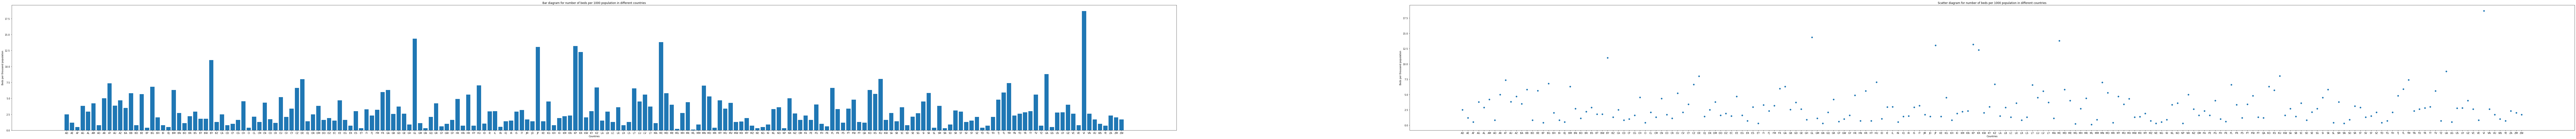

Enter K for K-means algorithm:10
The 10-means clusters by implementing 10-means clustering algorithm are:
[['PK', 'ML', 'MG', 'ET', 'GN', 'NE', 'NP', 'SN', 'BF', 'CI', 'SL', 'MR', 'TD', 'AF', 'NG', 'BJ', 'UG', 'IN', 'GT', 'HN', 'HT', 'ER', 'TG', 'TZ', 'MZ', 'YE'], ['NI', 'BD', 'CD', 'KH', 'LR', 'AO', 'BI', 'VE', 'SD', 'MM', 'SO', 'GH', 'PH', 'CF', 'WS', 'GW', 'ID', 'BO', 'MA', 'GM', 'CR', 'QA', 'AE', 'PS'], ['CM', 'PY', 'BZ', 'MW', 'LC', 'LS', 'SV', 'MX', 'KE', 'DJ', 'SB', 'IQ', 'JO'], ['OM', 'SY', 'LA', 'IR', 'EC', 'PE', 'EG', 'DO', 'GY', 'CG', 'RW', 'JM', 'VU', 'ZW', 'CO', 'BT', 'BW', 'MY', 'KI', 'DZ'], ['CL', 'KW', 'ZM', 'BH', 'SZ', 'GQ', 'CV', 'TH', 'SE', 'BR', 'KM', 'FJ', 'PA', 'KN', 'TN', 'ZA'], ['SG', 'CA', 'DK', 'AD', 'GB', 'GE', 'VN', 'TO', 'VC', 'NZ', 'SA', 'MH', 'BN', 'US', 'UY', 'TR', 'BS', 'ST', 'LB', 'AL', 'IS', 'IE', 'ES', 'IL', 'TT', 'KY'], ['IT', 'SR', 'FM', 'FI', 'PR', 'NL', 'PT', 'CY', 'MU', 'BA', 'LK', 'SC', 'NO', 'LY', 'GD', 'AG', 'DM', 'SM', 'AU'], ['UZ', 'ME', 'P

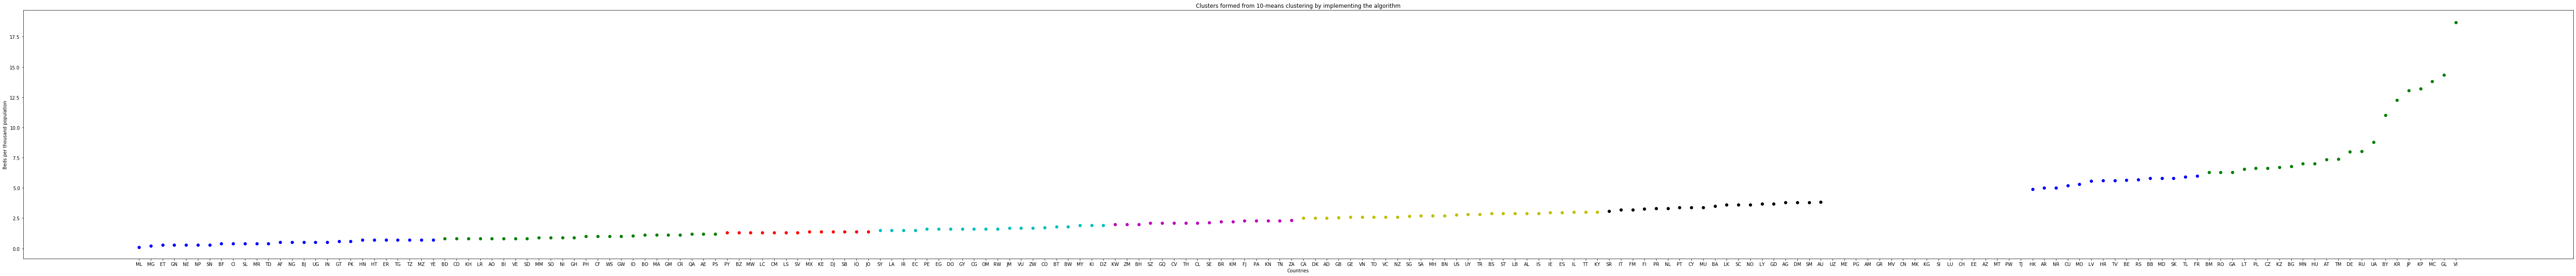

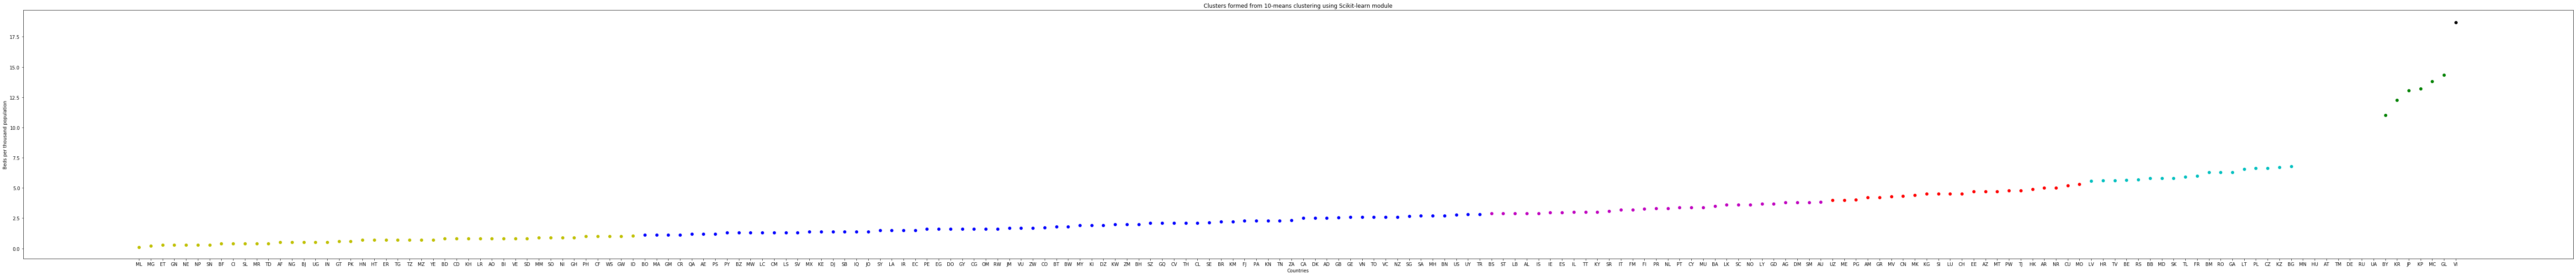

In [30]:
"""Global hospital beds(country granularity)"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_global_v1.csv',mode="r") as csv_file:   
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row and row[5]=="TOTAL":    #considering only total number of beds
            x1.append(row[0])                  #x1 is a list of countries and y1 is a list of beds for the countries
            y1.append(float(row[7]))
        r+=1
        
plt.figure(figsize=(200,10))                  #plotting two subplots of bar diagram and scatter diagram in one figure
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in different countries")
plt.subplot(122)
plt.scatter(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in different countries")
plt.show() 



z=[]                         #z is a list of lists of x1 and y1, it is created so that y1 can be sorted and corresponding
z.append(x1)                 #x1 values can be tracked
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))                                  #k is the value of K in k-means and m is the distance between initial
cluster=[]                                              #cluster centers, so every m-th sorted data are the initial centers
centers=[]                                              #cluster is a list of dictionaries where keys are countries and values 
for i in range(k):                                      #are beds, centers is a list of centers whose values are number of beds
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):                                 #selecting the center with minimum distance
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2         #updating the center
            break
cluster_areas=[]                                      #cluster_areas is a list of the clusters with country names
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters by implementing %d-means clustering algorithm are:"%(k,k))
print(cluster_areas)
colors=['b','g','r','c','m','y','k','w']           #list of colours
plt.figure(figsize=(100,10))
for state in x1:                                   #taking each country from x1 and creating scatter diagram with different 
    for i in range(k):                             #colours according to their cluster numbers in cluster_areas list
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break

plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k) 



arr=np.array(y1)                                           #y1 is converted to arr
arr.resize(arr.shape[0],1)                                 #modifying the size from (198,) to (198,1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_                      #because the data is sorted, klabels are of the form [2,2,2,3,3,4,4,4,4,0,0,1,1]
cluster_areas_sklearn=[]                    #cluster_areas_sklearn is the list of cluster names which we get after applying
l=[]                                        #Kmeans from sklearn. l is one cluster, it is appended to cluster_areas_sklearn
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])                     #for the 1st element in x1,it is appended to l
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:       #for other elements except the last one,if the previous one's label matches with
            l.append(x1[i])                #the current one's label,the current one will go the same cluster as the prev one
        else:
            cluster_areas_sklearn.append(l)  #if doesn't match,the current cluster will be appended with cluster_areas_sklearn
            l=[]                             #a new list will be created and the current element will be appended with l
            l.append(x1[i])
    if i==len(x1)-1:                         #when the last element is encountered, if its klabel is equal to its previous
        if klabels[i-1]==klabels[i]:         #element's klabel, then it will go to the same cluster and the cluster will be
            l.append(x1[i])                  #appended to cluster_areas_sklearn. Else, the previous cluster will be appended to
            cluster_areas_sklearn.append(l)  #cluster_areas_sklearn,a new cluster will be formed, this element will be appended to
        else:                                #this cluster, and the cluster with single element will be appended to cluster_areas
            cluster_areas_sklearn.append(l)  #_sklearn
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)                         
                              
        
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(100,10))
for i in range(len(x1)):                    #taking each country from x1 and creating scatter diagram with different colours
    state=[x1[i]]                           #according to the cluster numbers in cluster_areas_sklearn list
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}                     #data is a dictionary where the values are list of two dictionaries, the 1st dictionary corresponds
for s in range(len(x1)-1):  #to the cluster_areas list and the 2nd one corresponds to the cluster_areas_sklearn list
    l=[]                    #data is of the form {"A":[{"B":"Same","C":"Same","D":"Different"},{"B":"Same","C":"Different",
    for i in range(k):      #"D":"Different"}],"B":[{"C":"Same","D":"Different"},{"C":"Different","D":"Different"}]}
        if x1[s] in cluster_areas[i]:      #for s-th country in x1, it is found that the country is in i-th cluster
            break
    dic={}
    for t in range(s+1,len(x1)):          #from the (s+1)-th to last country it is found whether that country belongs to same
        if x1[t] in cluster_areas[i]:     #or different cluster as the s-th country in cluster_areas list 
            dic[x1[t]]="Same"             #dic is the dictionary of s-th country of the format countryname:beds for other
        else:                             #countries greater than s-th
            dic[x1[t]]="Different"
    l.append(dic)                         #dic is appended to l, the list of 2 dictionaries, dic is the first dictionary
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:   #similar job for cluster_areas_sklearn, j is the cluster number just as i
            break                               #dic1 is like dic,it is the 2nd and last dictionary of l
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l                       #finally data[s-th country]=l
perfectness=[]                          #perfectness is a list where the values are number of matches for each country
for i in data.keys():                   #now for each country,if the next country is in same cluster in both the cluster_areas
    p=0                                 #and cluster_areas_sklearn or they are in different clusters in both cluster_areas
    for j in data[i][0].keys():         #and cluster_areas_sklearn, then the two countries match in these two list of clusters    
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2           #for n countries, n-th country can have a maximum of (n-1) matches, (n-1)-th one can have
result=float(sum(perfectness)/s)    #a maximum of (n-2) matches and so on. so number of all possible cases is (n-1)*n/2
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 89.5%

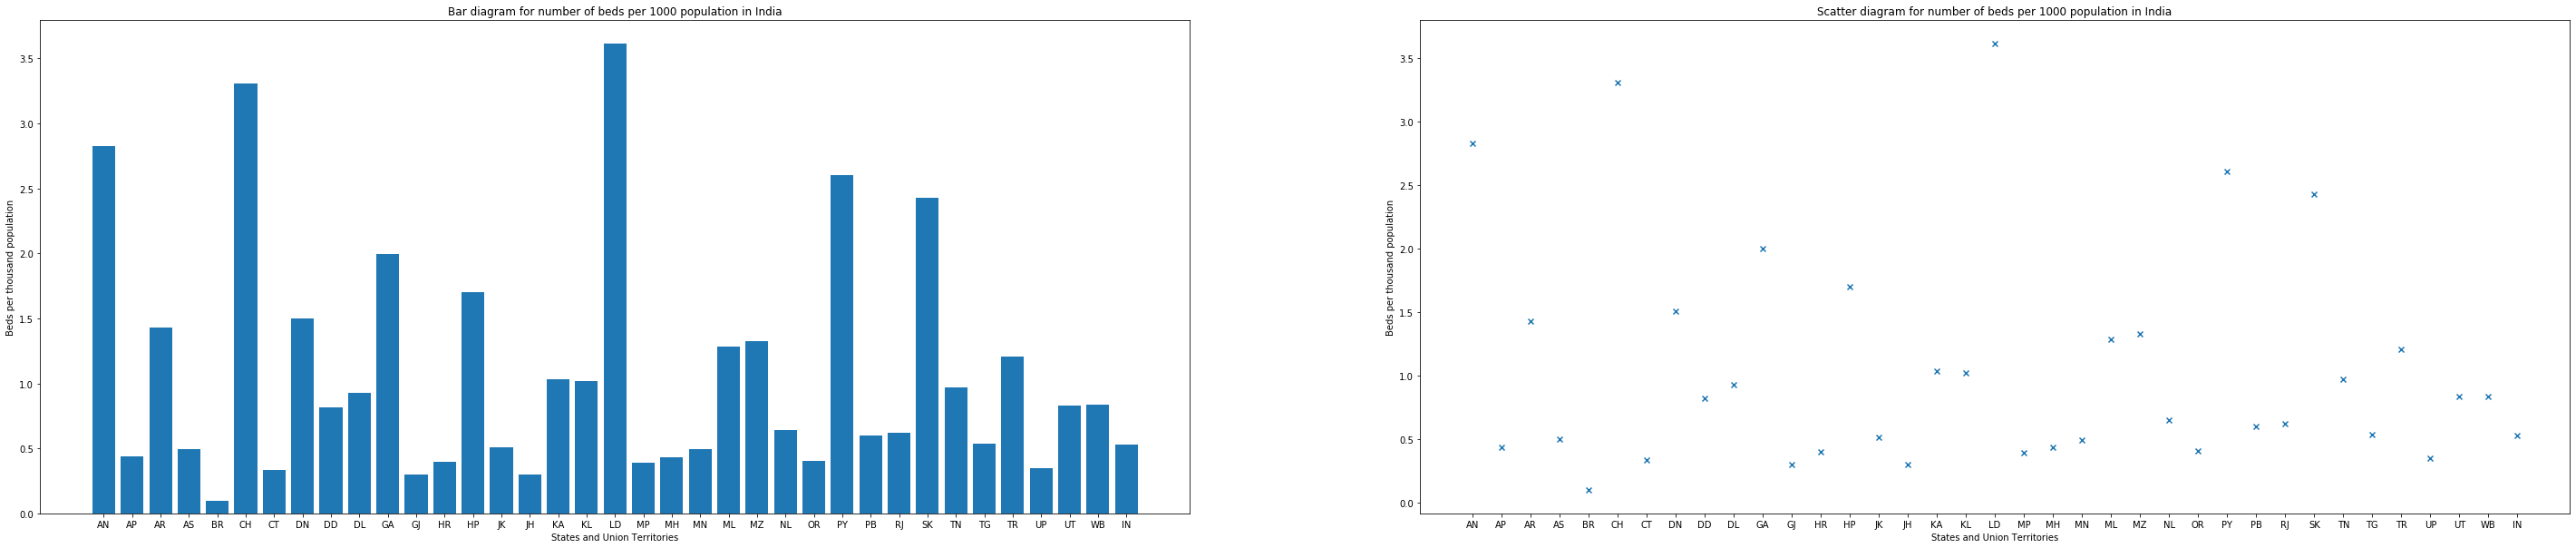

Enter K for K-means algorithm:4
The 4-means clusters are:
[['OR', 'BR', 'GJ', 'JH', 'CT', 'UP', 'MP', 'HR', 'MH', 'AP'], ['TG', 'MN', 'AS', 'JK', 'IN', 'PB', 'RJ', 'NL'], ['DL', 'DD', 'UT', 'WB', 'TN', 'KL', 'KA', 'TR'], ['AR', 'ML', 'MZ', 'DN', 'HP', 'GA', 'SK', 'PY', 'AN', 'CH', 'LD']]
The 4-means clusters by using scikit-learn are:
[['BR', 'GJ', 'JH', 'CT', 'UP', 'MP', 'HR', 'OR', 'MH', 'AP', 'MN', 'AS', 'JK', 'IN', 'TG', 'PB', 'RJ', 'NL'], ['DD', 'UT', 'WB', 'DL', 'TN', 'KL', 'KA', 'TR', 'ML', 'MZ', 'AR', 'DN', 'HP'], ['GA', 'SK', 'PY', 'AN'], ['CH', 'LD']]
Match percentage 76.276276%


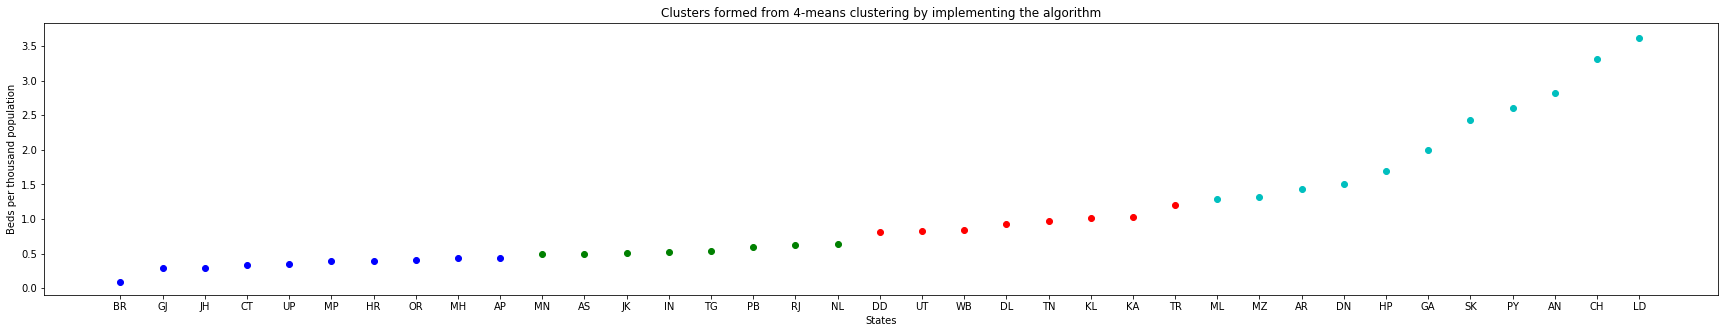

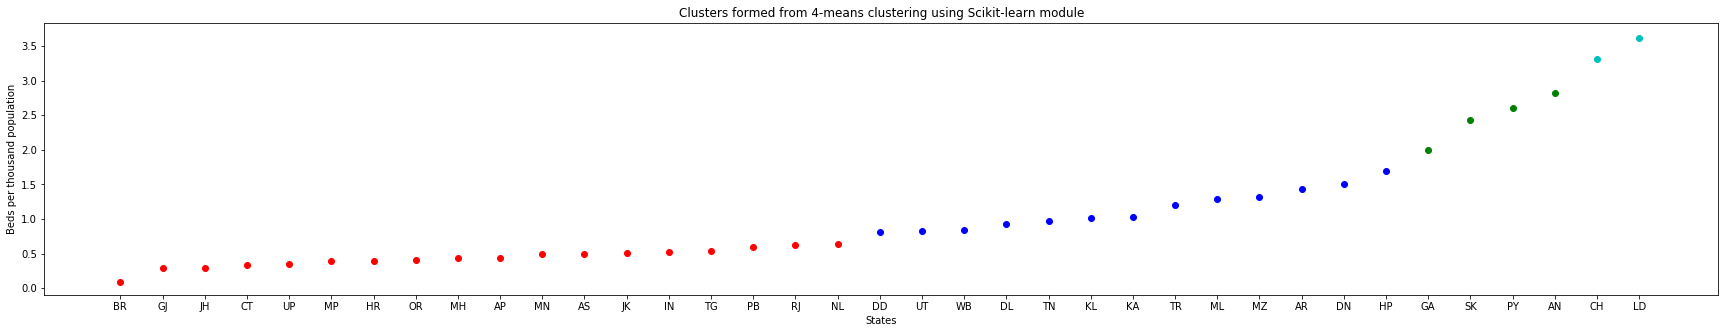

In [29]:
"""Indian statewise TOTAL hospital beds extracted from NHP(National Health Profile) as of 2015-2018"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_india_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[1])
            y1.append(float(row[7]))
        r+=1
        
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("States and Union Territories")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in India")
plt.subplot(122)
plt.scatter(x1,y1,marker="x")
plt.xlabel("States and Union Territories")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in India")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)

colors=['b','g','r','c','m','y','k','w']


plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")





Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 76.28%

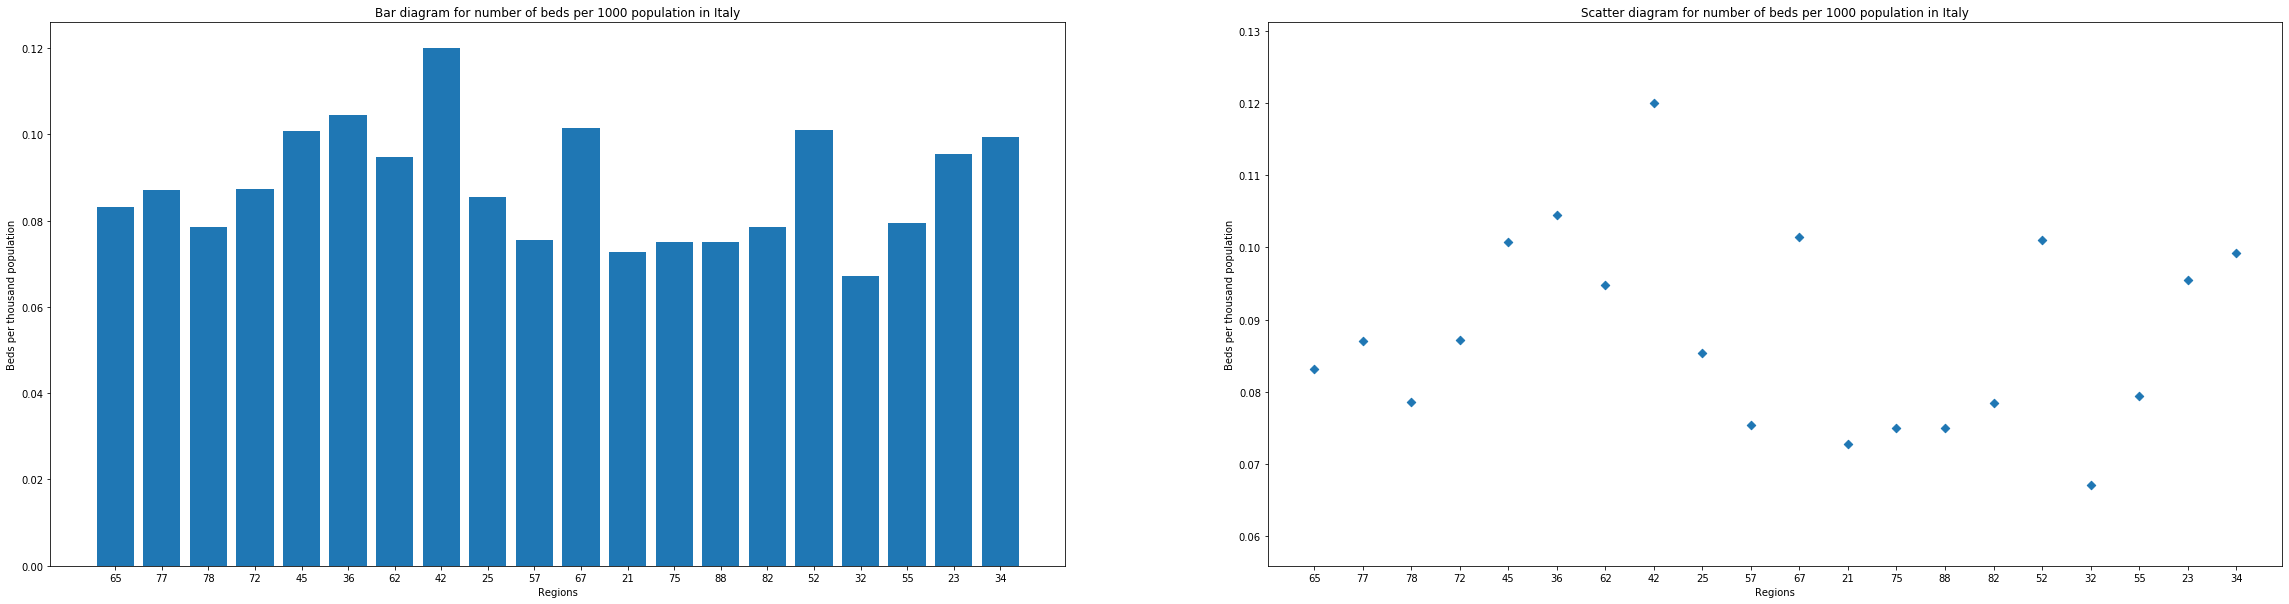

Enter K for K-means algorithm:4
The 4-means clusters are:
[['57', '32', '21', '75', '88', '82', '78', '55'], ['65', '25', '77', '72'], ['62', '23'], ['52', '34', '45', '67', '36', '42']]
The 4-means clusters by using scikit-learn are:
[['32', '21', '75', '88', '57', '82', '78', '55'], ['65', '25', '77', '72'], ['62', '23', '34', '45', '52', '67', '36'], ['42']]
Match percentage 92.105263%


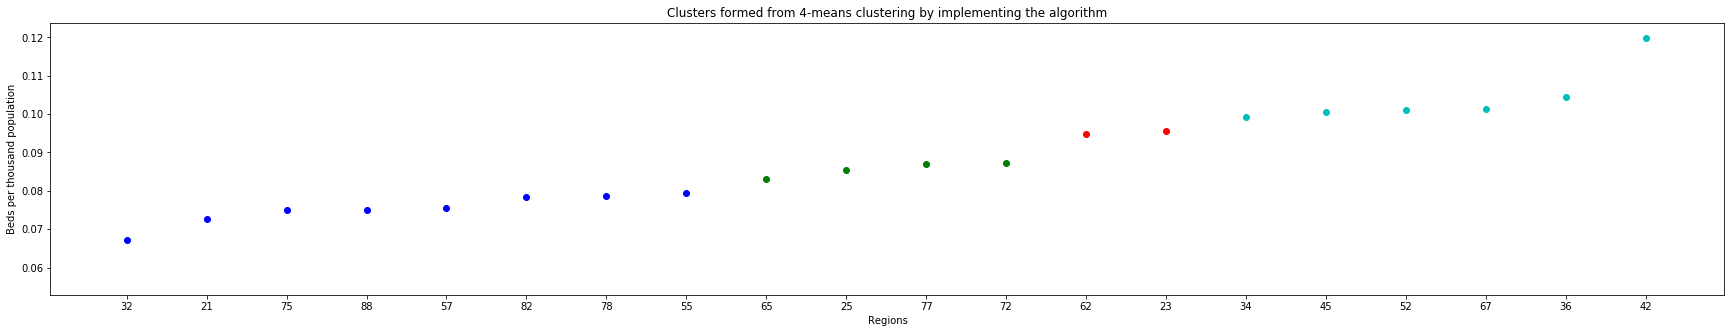

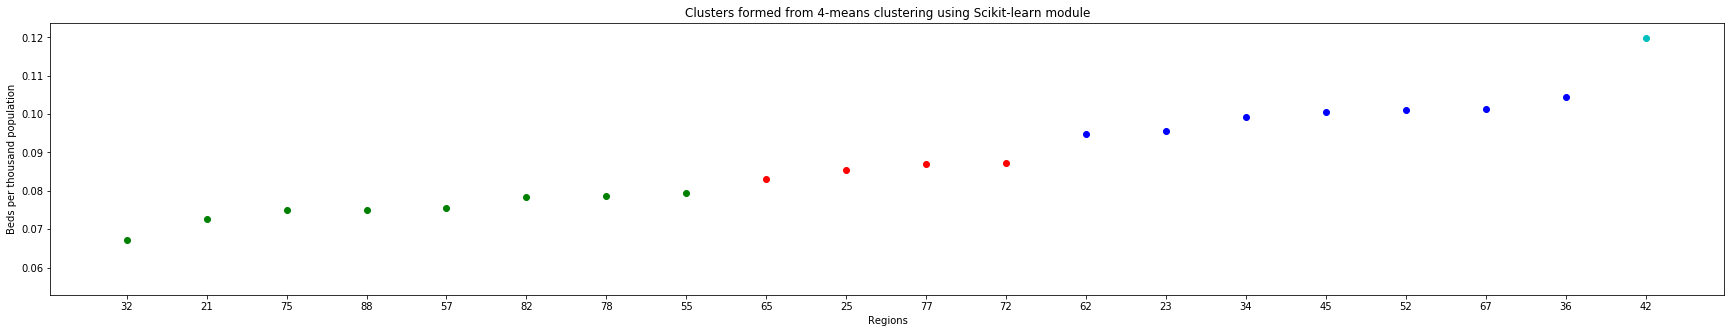

In [28]:
"""Italian regionwise ICU(excluding NICU) hospital beds extracted from dati.salute.gov.it as of 2018"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_italy_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[1])
            y1.append(float(row[7]))
        r+=1
        
plt.figure(figsize=(40,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Italy")
plt.subplot(122)
plt.scatter(x1,y1,marker="D")
plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Italy")
plt.show() 



z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)

colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break

plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")


            


Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 92.11%

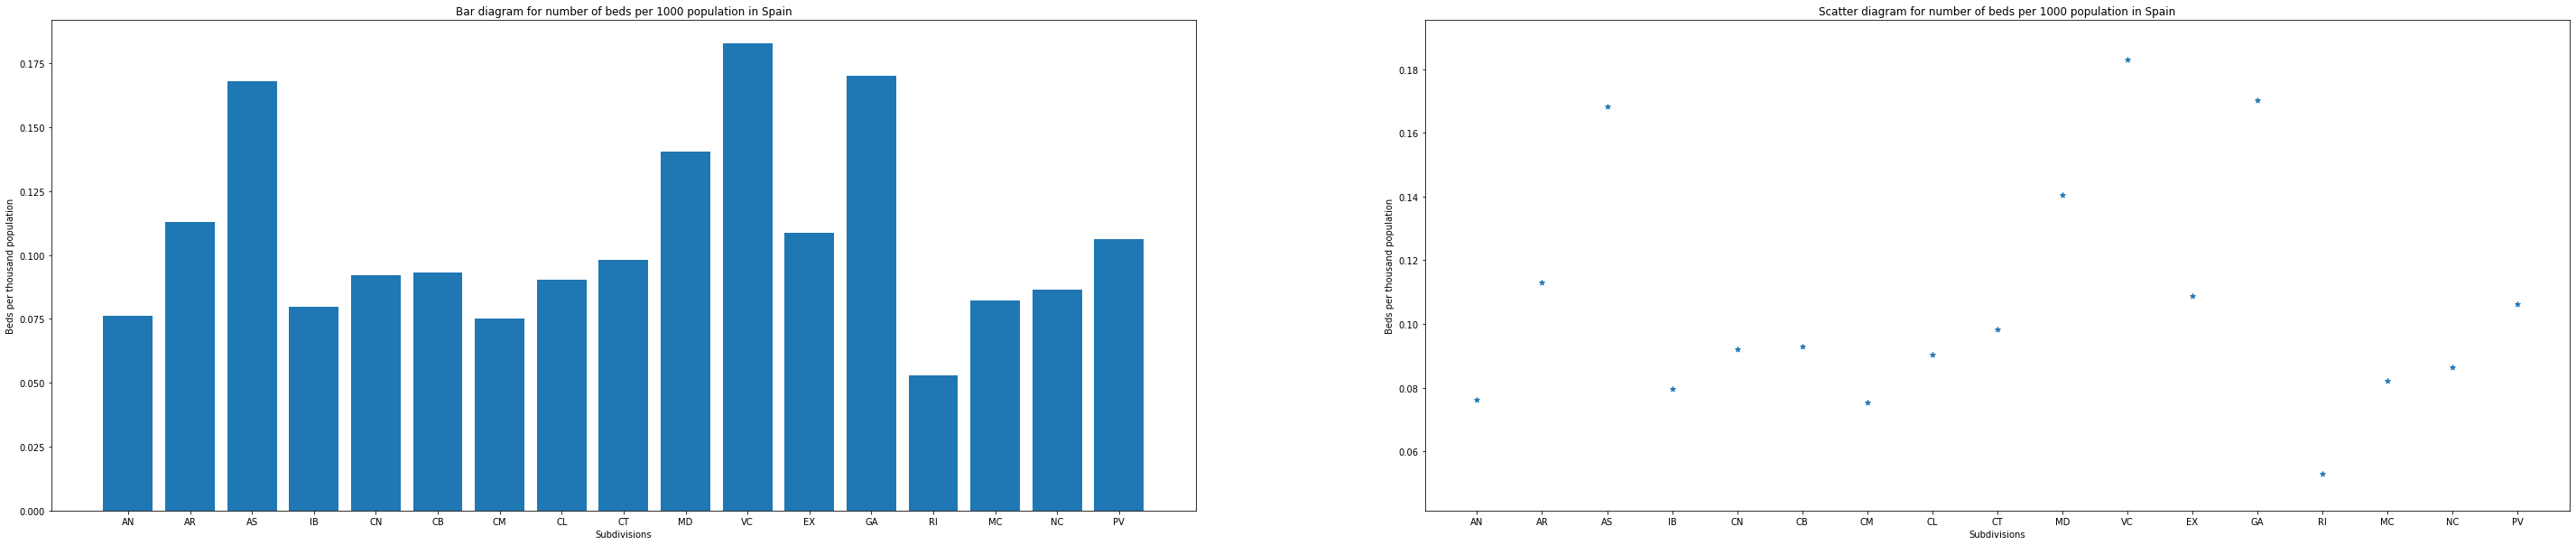

Enter K for K-means algorithm:3
The 3-means clusters are:
[['MC', 'RI', 'CM', 'AN', 'IB'], ['CB', 'NC', 'CL', 'CN', 'CT'], ['AR', 'PV', 'EX', 'MD', 'AS', 'GA', 'VC']]
The 3-means clusters by using scikit-learn are:
[['RI', 'CM', 'AN', 'IB', 'MC', 'NC'], ['CL', 'CN', 'CB', 'CT', 'PV', 'EX', 'AR'], ['MD', 'AS', 'GA', 'VC']]
Match percentage 75.735294%


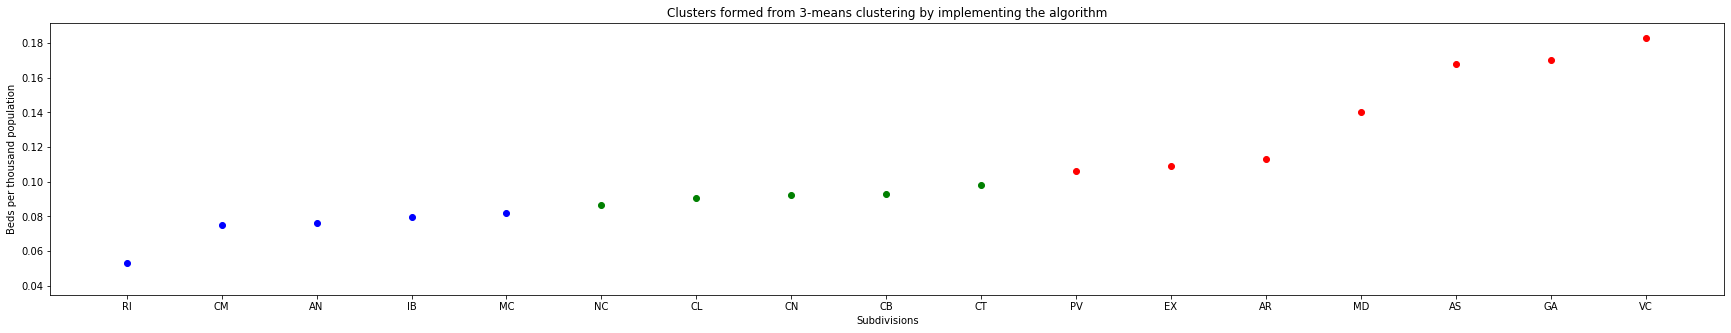

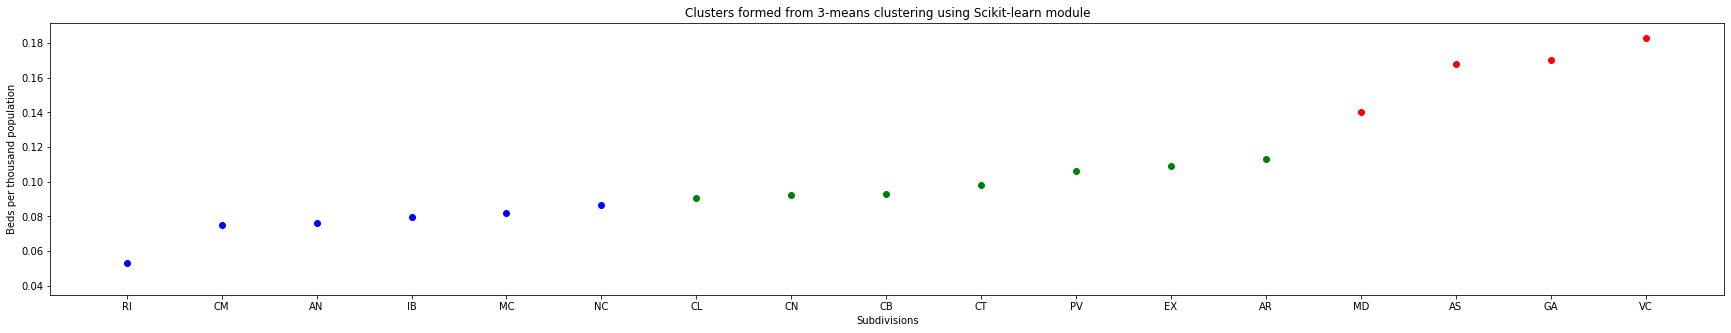

In [27]:
"""Spanish autonomous communitywise ICU(excluding NICU and pediatric) hospital beds extracted from Medicina Intensiva Journal as of 2011"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_spain_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[1])
            y1.append(float(row[7]))
        r+=1
        
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Subdivisions")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="*")
plt.xlabel("Subdivisions")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 



z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break

plt.xlabel("Subdivisions")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)



arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Subdivisions")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")




Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 75.74%

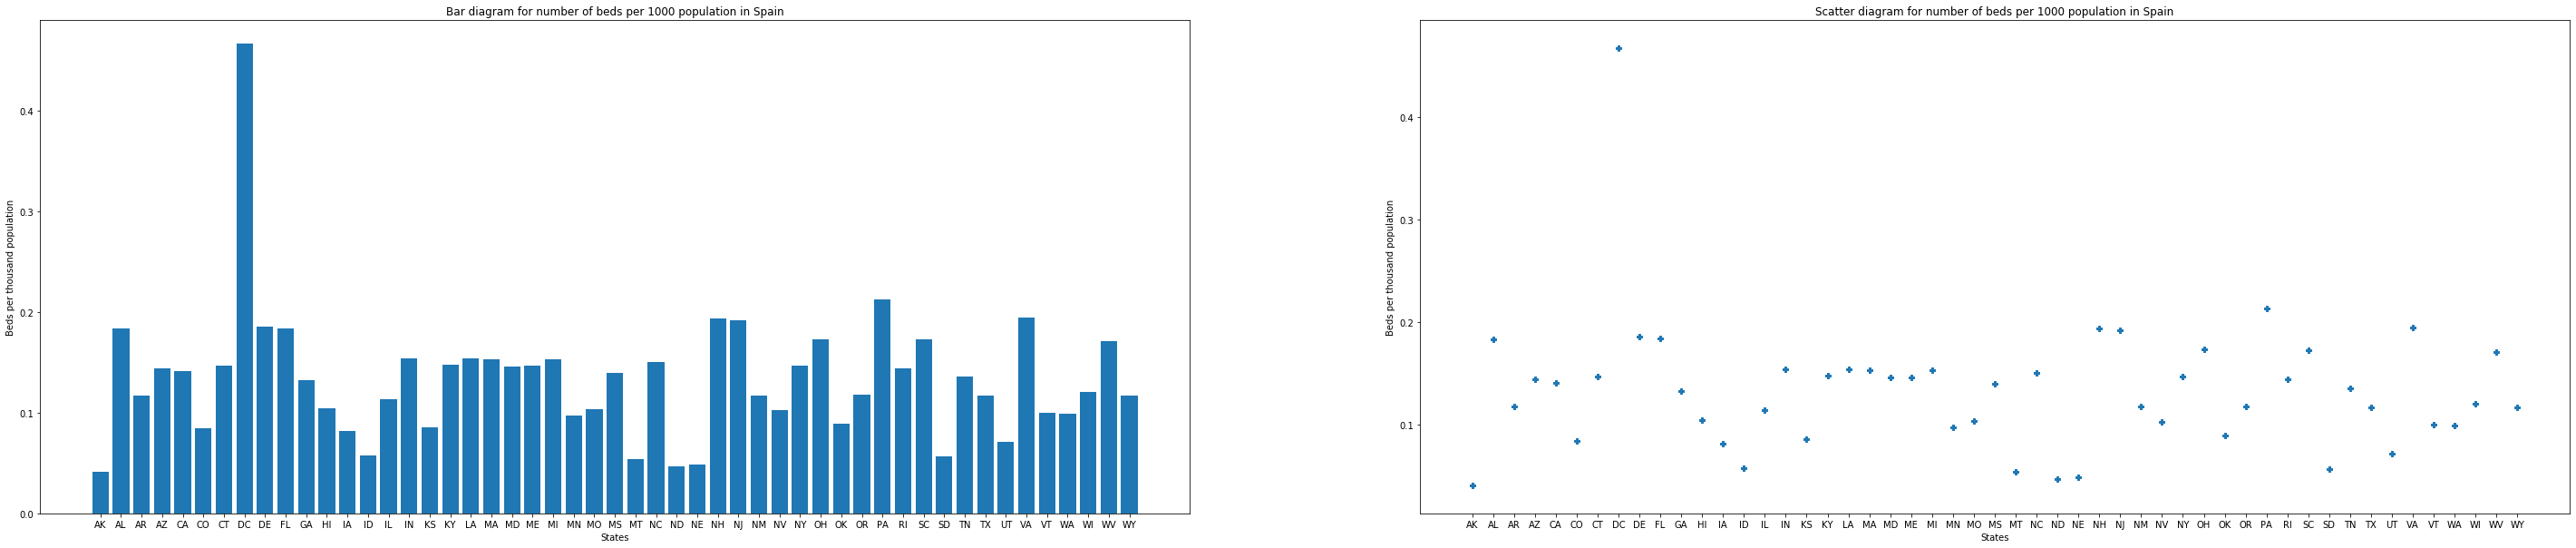

Enter K for K-means algorithm:5
The 5-means clusters are:
[['CO', 'AK', 'ND', 'NE', 'MT', 'SD', 'ID', 'UT', 'IA', 'KS', 'OK'], ['HI', 'MN', 'WA', 'VT', 'NV', 'MO', 'IL', 'WY', 'TX', 'AR', 'NM', 'OR', 'WI'], ['GA', 'TN', 'MS', 'CA'], ['NY', 'RI', 'AZ', 'MD', 'ME', 'CT', 'KY', 'NC', 'MI', 'MA', 'IN', 'LA'], ['WV', 'SC', 'OH', 'AL', 'FL', 'DE', 'NJ', 'NH', 'VA', 'PA', 'DC']]
The 5-means clusters by using scikit-learn are:
[['AK', 'ND', 'NE', 'MT', 'SD', 'ID', 'UT'], ['IA', 'CO', 'KS', 'OK', 'MN', 'WA', 'VT', 'NV', 'MO', 'HI', 'IL', 'WY', 'TX', 'AR', 'NM', 'OR', 'WI'], ['GA', 'TN', 'MS', 'CA', 'RI', 'AZ', 'MD', 'ME', 'NY', 'CT', 'KY', 'NC', 'MI', 'MA', 'IN', 'LA'], ['WV', 'SC', 'OH', 'AL', 'FL', 'DE', 'NJ', 'NH', 'VA', 'PA'], ['DC']]
Match percentage 89.176471%


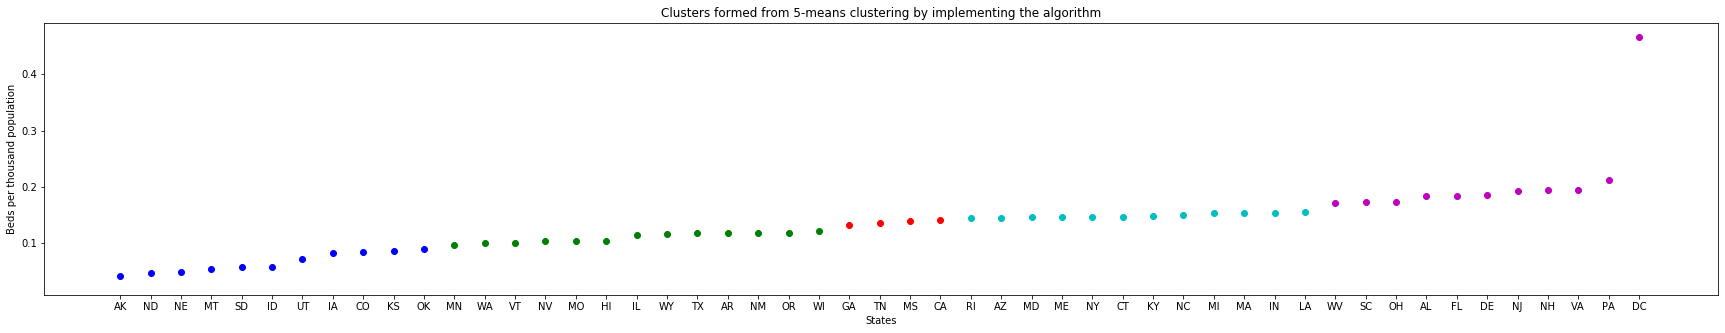

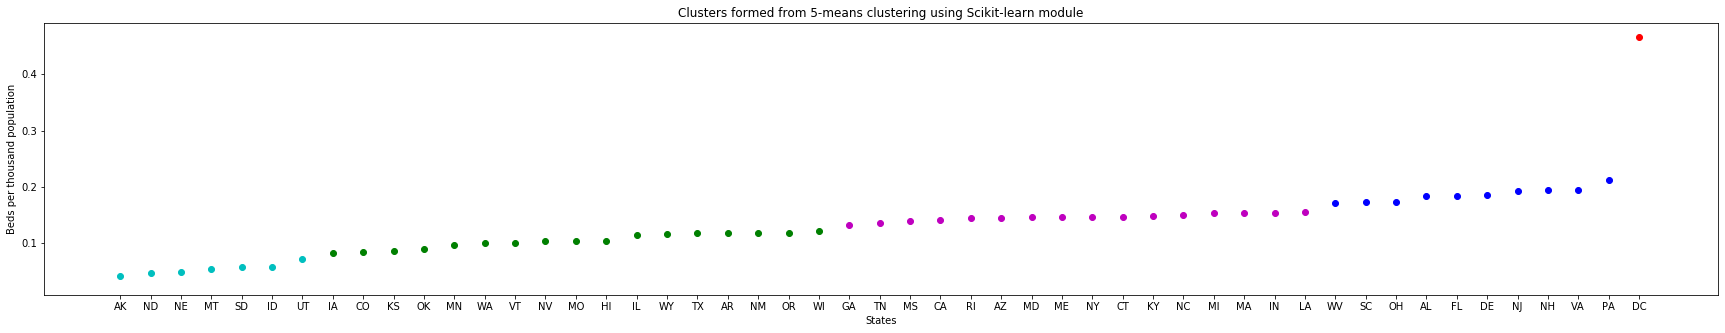

In [26]:
"""USA countywise hospital ICU beds extracted from knh.org"""
d={}
d1={}
r=0
with open("D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_knh_v1.csv",mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            if row[1] not in d.keys():
                d[row[1]]=float(row[7])
                d1[row[1]]=1
            else:
                d[row[1]]+=float(row[7])
                d1[row[1]]+=1
        r+=1
for k in d.keys():
    d[k]=d[k]/d1[k]
x1=[]
y1=[]
for x,y in d.items():
    x1.append(x)
    y1.append(y)
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="P")
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)
    
colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break 
            
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")

 

Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 89.18%

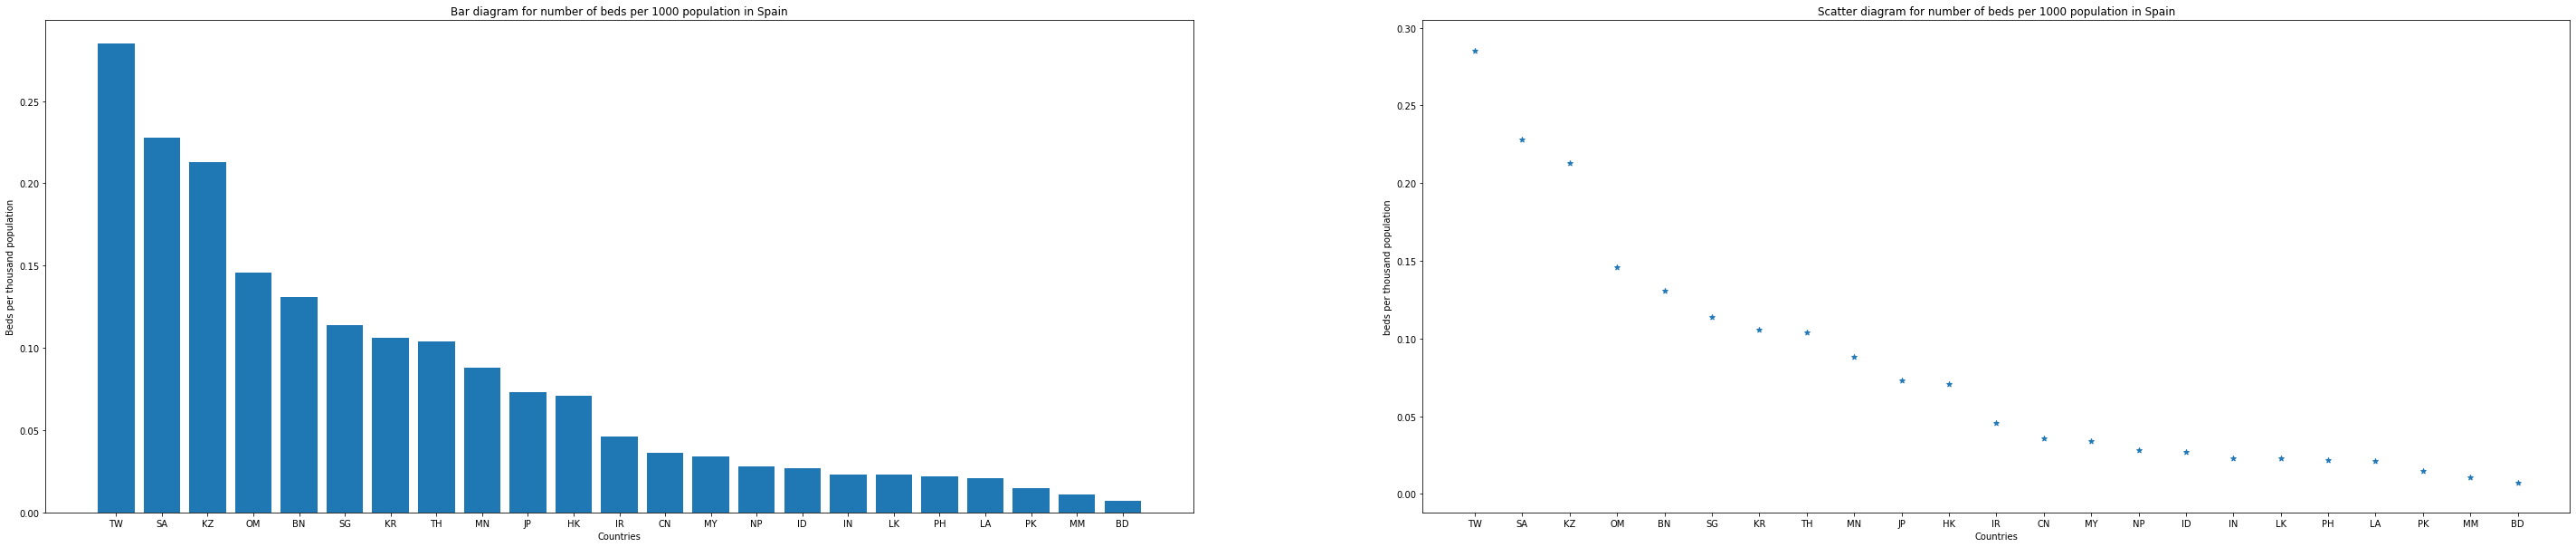

Enter K for K-means algorithm:4
The 4-means clusters are:
[['PH', 'BD', 'MM', 'PK'], ['NP', 'LA', 'PH', 'LK', 'IN', 'ID', 'MY', 'CN', 'IR'], ['HK', 'JP', 'MN'], ['KR', 'TH', 'SG', 'BN', 'OM', 'KZ', 'SA', 'TW']]
The 4-means clusters by using scikit-learn are:
[['BD', 'MM', 'PK', 'LA', 'PH', 'LK', 'IN', 'ID', 'NP', 'MY', 'CN', 'IR'], ['HK', 'JP', 'MN'], ['TH', 'KR', 'SG', 'BN', 'OM'], ['KZ', 'SA', 'TW']]
Match percentage 81.818182%


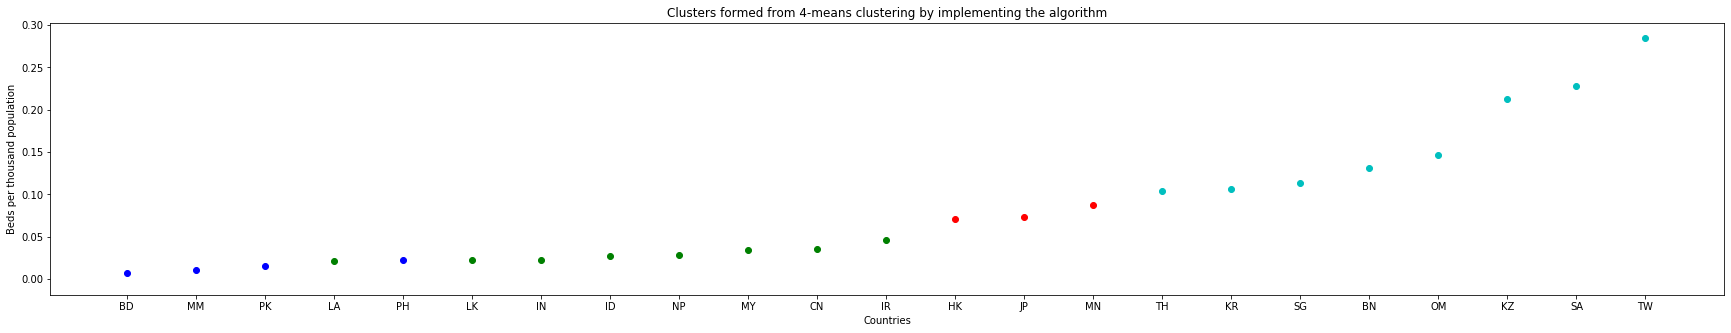

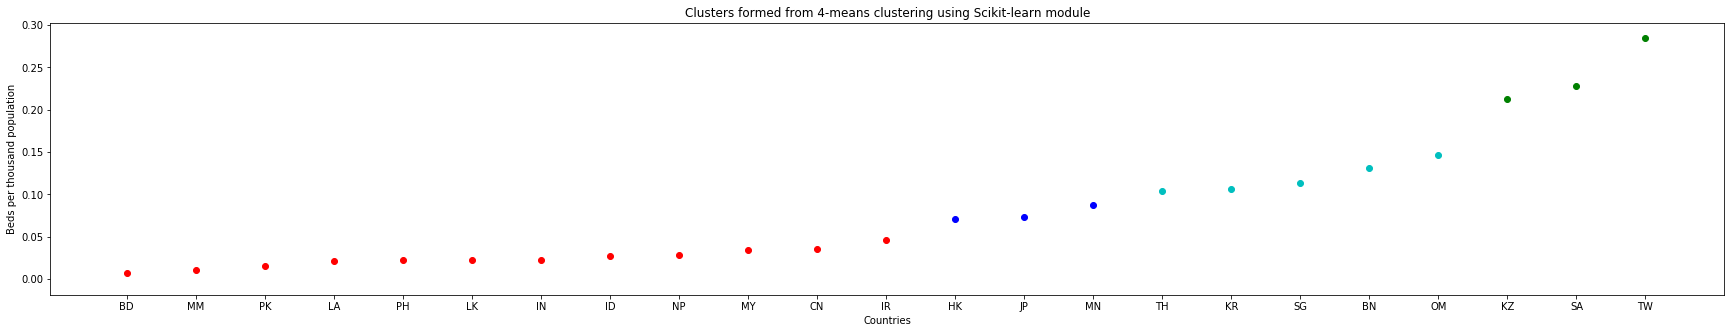

In [25]:
"""Asian hospital ICU beds extracted from CMM journal publication 2017"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_ccm_journal_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[0])
            y1.append(float(row[7]))
        r+=1
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="*")
plt.xlabel("Countries")
plt.ylabel("beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 



z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 81.82%

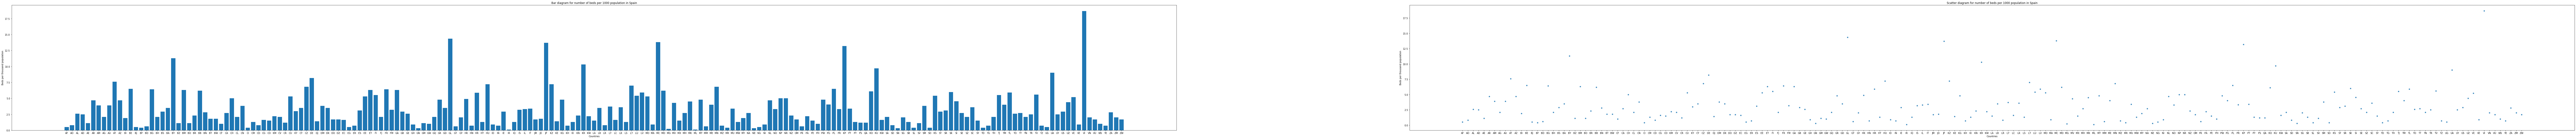

Enter K for K-means algorithm:10
The 10-means clusters are:
[['MM', 'IR', 'ML', 'MG', 'GN', 'NE', 'SN', 'MR', 'BF', 'CI', 'SL', 'TD', 'SO', 'AF', 'BJ', 'EG', 'NG', 'UG', 'BD', 'PK', 'GT', 'MZ', 'KH', 'HN', 'IN', 'TG', 'TZ', 'ER', 'YE'], ['VE', 'LR', 'AO', 'CD', 'SD', 'GH', 'NI', 'ID', 'MA', 'CF', 'PH', 'WS', 'GW', 'BO', 'SV', 'AE', 'GM', 'BZ'], ['CM', 'CR', 'QA', 'PS', 'PY', 'MW', 'HT', 'KI', 'SB', 'LS', 'IQ', 'DJ', 'KE', 'CO', 'LA', 'SY', 'MX', 'PE'], ['OM', 'LC', 'RW', 'CG', 'EC', 'DZ', 'JM', 'VU', 'DO', 'ZW', 'BW', 'BT', 'JO', 'MY', 'BI'], ['CV', 'SG', 'VN', 'ZM', 'GY', 'TN', 'AG', 'GQ', 'FJ', 'SA', 'SZ', 'CL', 'BH', 'TH', 'PA', 'KM', 'KW', 'NZ', 'KN', 'BR'], ['TT', 'TR', 'UY', 'AD', 'GE', 'AL', 'TO', 'CA', 'MH', 'NA', 'SE', 'BN', 'ZA', 'BS', 'US', 'GB', 'IE', 'ST', 'KY', 'ES', 'SR', 'IS', 'FM'], ['IT', 'IL', 'NO', 'PR', 'MU', 'PT', 'GD', 'LB', 'CY', 'BA', 'DK', 'LK', 'SC', 'LY', 'SM', 'CN', 'DM', 'AM', 'AU'], ['PG', 'ME', 'TM', 'MV', 'UZ', 'MK', 'SI', 'AR', 'AZ', 'NL', 'KG', 'MT', 

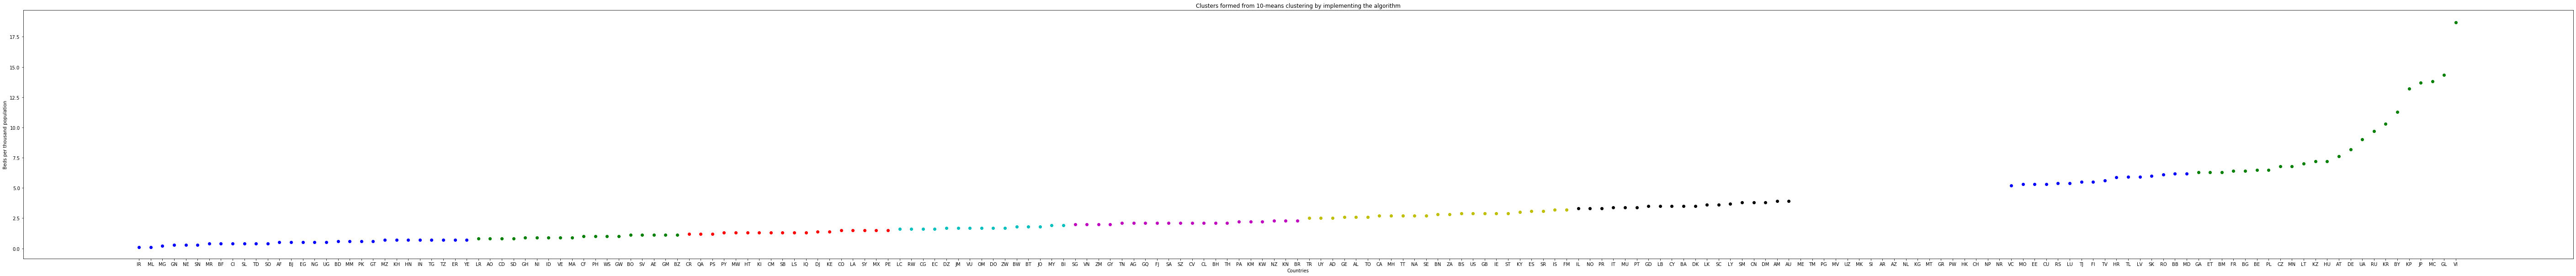

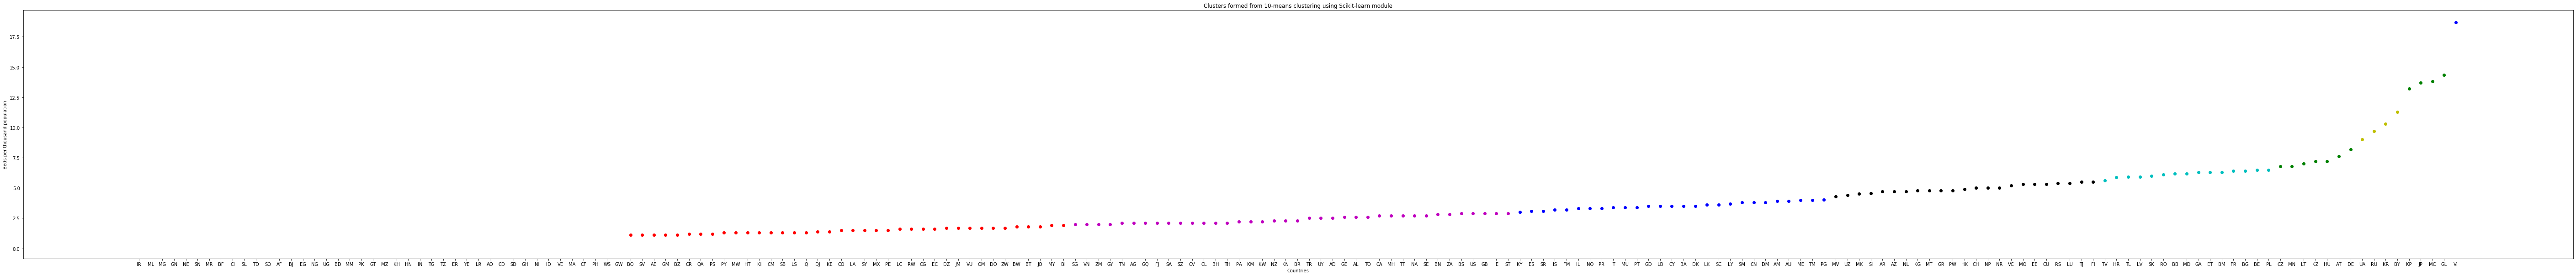

In [24]:
"""World's countries hospital beds extracted from datahub.io"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_datahub_worldbank_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[0])
            y1.append(float(row[7]))
        r+=1
plt.figure(figsize=(200,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="*")
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(100,10))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(100,10))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 89.96%

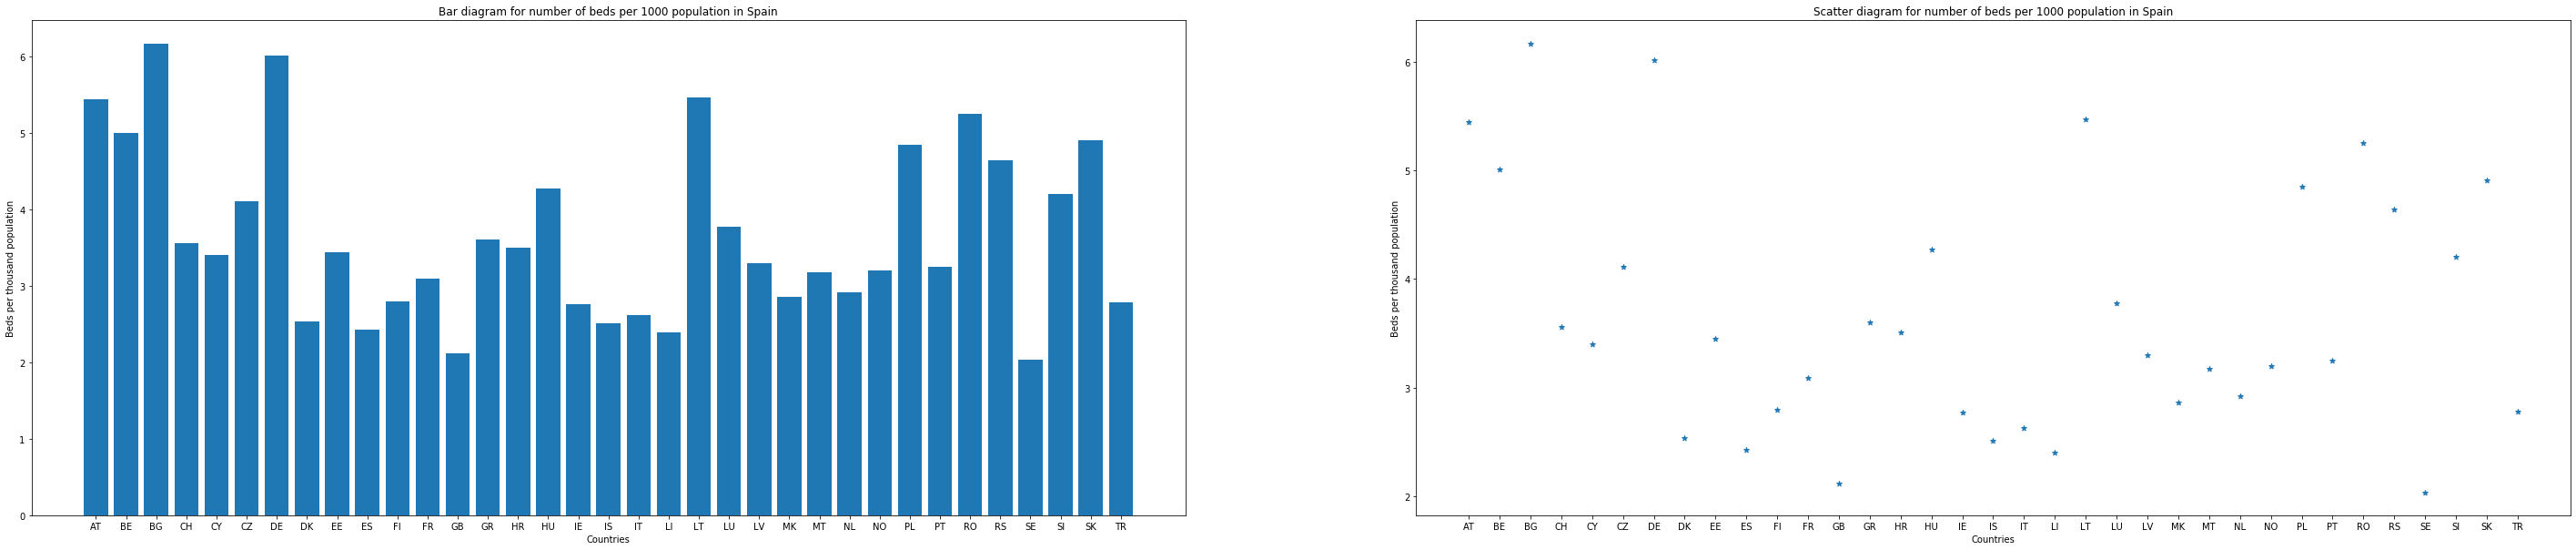

Enter K for K-means algorithm:5
The 5-means clusters are:
[['DK', 'SE', 'GB', 'LI', 'ES', 'IS', 'IT'], ['MK', 'IE', 'TR', 'FI', 'NL'], ['PT', 'FR', 'MT', 'NO', 'LV', 'CY'], ['CH', 'EE', 'HR', 'GR', 'LU'], ['HU', 'CZ', 'SI', 'RS', 'PL', 'SK', 'BE', 'RO', 'AT', 'LT', 'DE', 'BG']]
The 5-means clusters by using scikit-learn are:
[['SE', 'GB', 'LI', 'ES', 'IS', 'DK', 'IT', 'IE', 'TR', 'FI', 'MK', 'NL'], ['FR', 'MT', 'NO', 'PT', 'LV', 'CY', 'EE', 'HR', 'CH', 'GR'], ['LU', 'CZ', 'SI', 'HU'], ['RS', 'PL', 'SK', 'BE', 'RO', 'AT', 'LT'], ['DE', 'BG']]
Match percentage 82.016807%


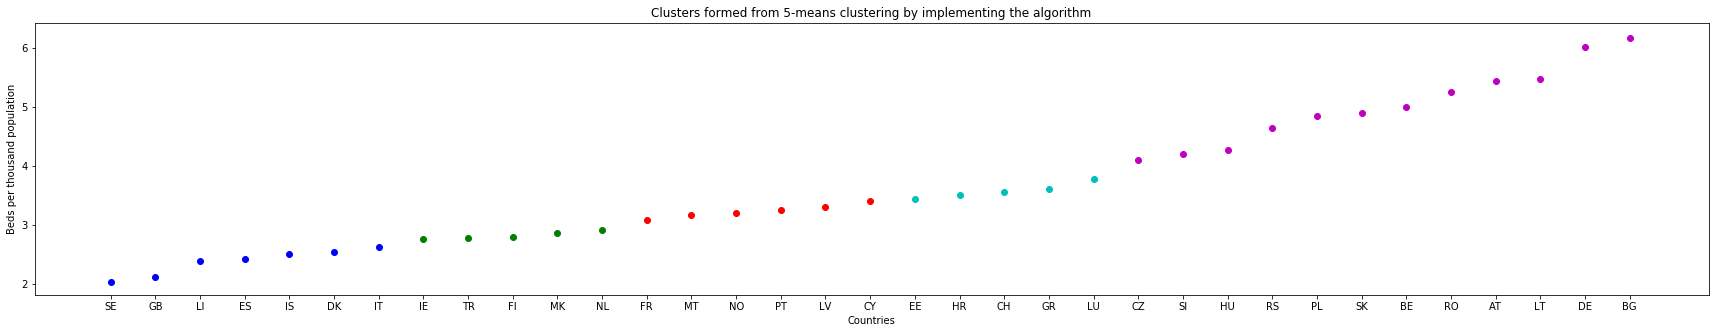

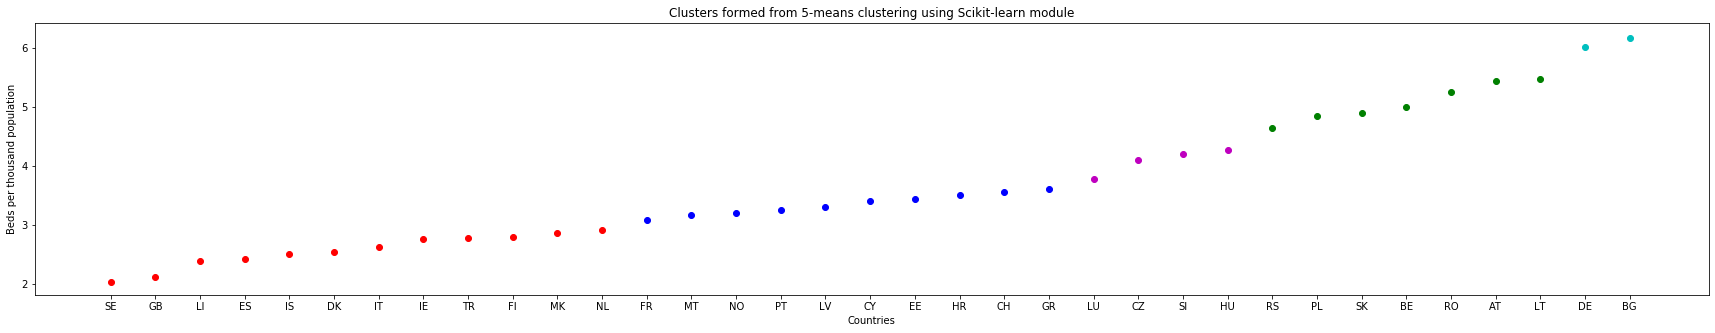

In [23]:
"""European countries hospital acute beds extracted from eurostat services"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_eurostat_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[0])
            y1.append(float(row[7]))
        r+=1
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="*")
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 82.02%

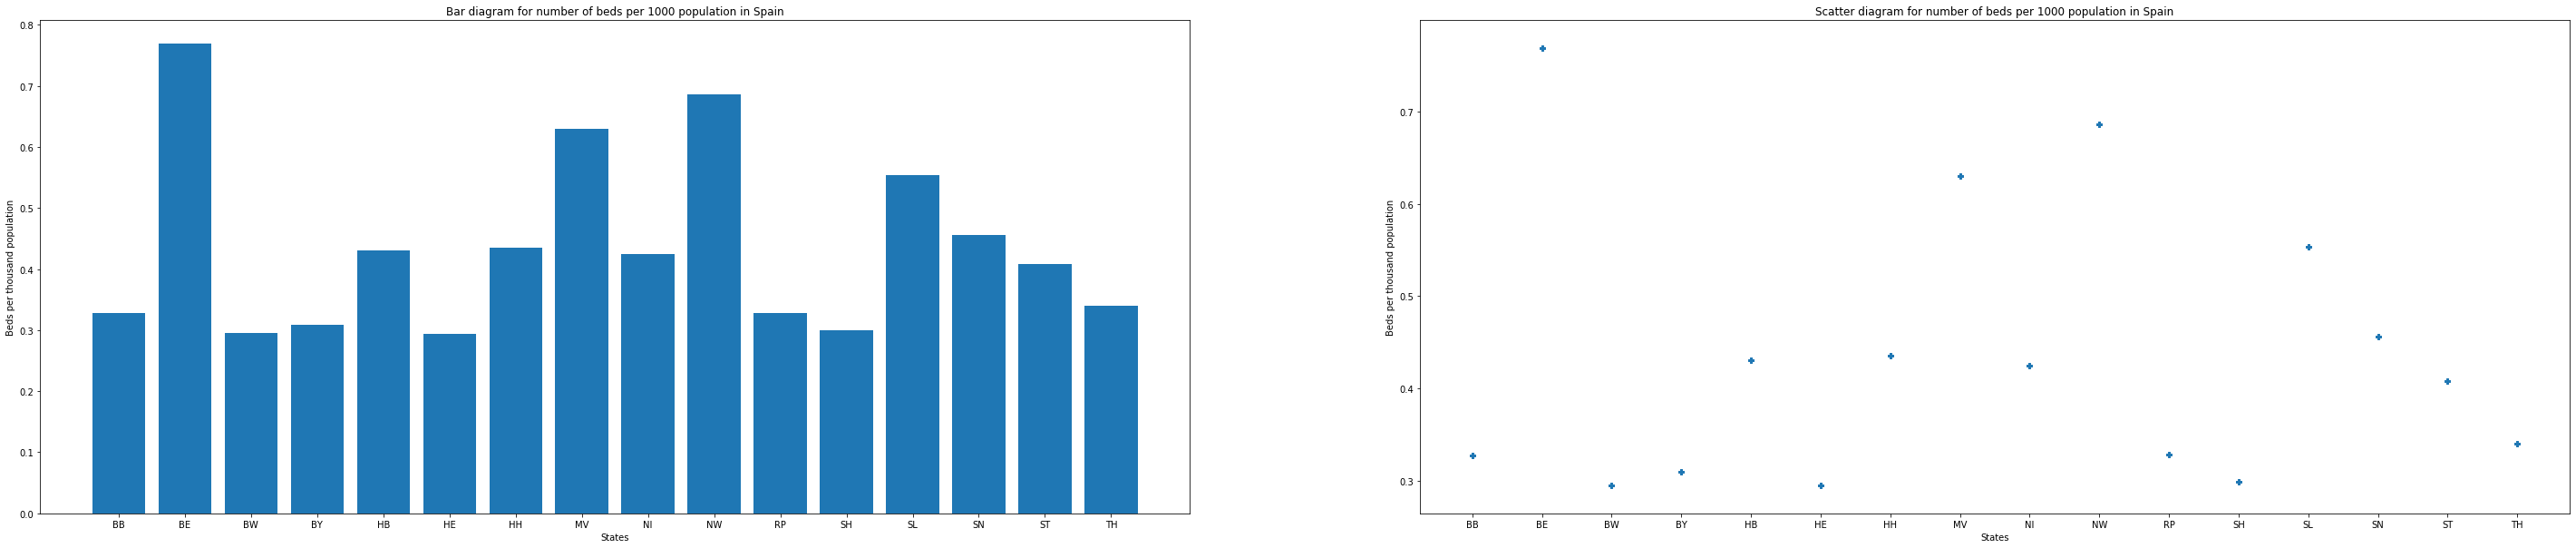

Enter K for K-means algorithm:3
The 3-means clusters are:
[['BB', 'HE', 'BW', 'SH', 'BY', 'RP', 'TH'], ['NI', 'ST', 'HB', 'HH', 'SN'], ['SL', 'MV', 'NW', 'BE']]
The 3-means clusters by using scikit-learn are:
[['HE', 'BW', 'SH', 'BY', 'BB', 'RP', 'TH'], ['ST', 'NI', 'HB', 'HH', 'SN', 'SL'], ['MV', 'NW', 'BE']]
Match percentage 93.333333%


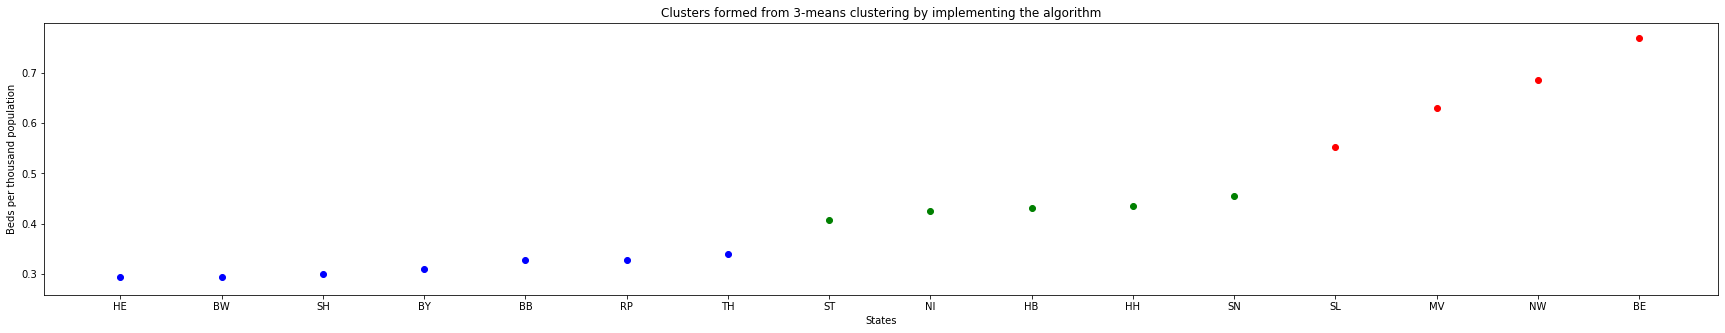

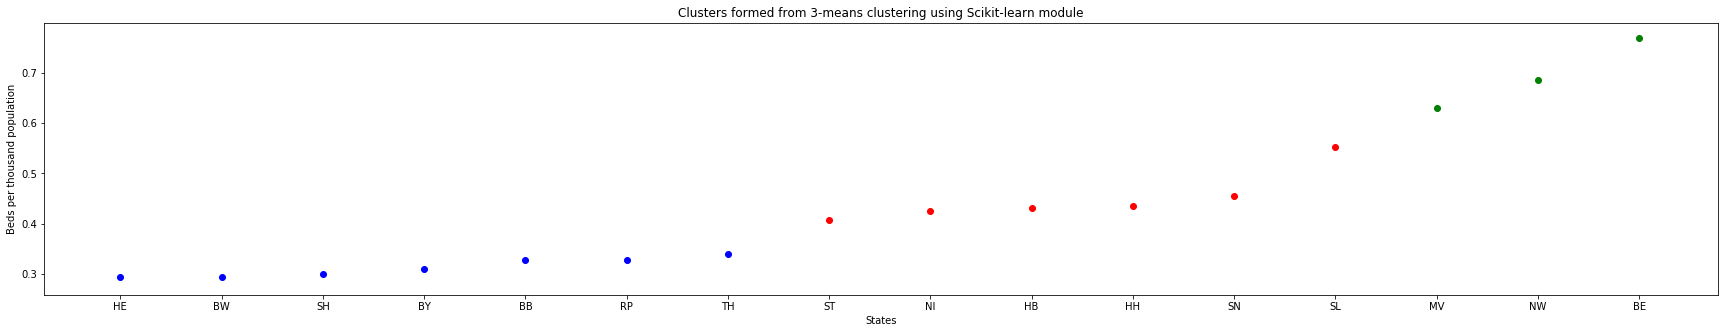

In [22]:
"""Germany countywise hospital ICU beds extracted from Kaggle"""
d={}
d1={}
r=0
with open("D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_germany_kaggle_v1.csv",mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            if row[1] not in d.keys():
                d[row[1]]=float(row[7])
                d1[row[1]]=1
            else:
                d[row[1]]+=float(row[7])
                d1[row[1]]+=1
        r+=1
for k in d.keys():
    d[k]=d[k]/d1[k]
x1=[]
y1=[]
for x,y in d.items():
    x1.append(x)
    y1.append(y)
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="P")
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 93.33%

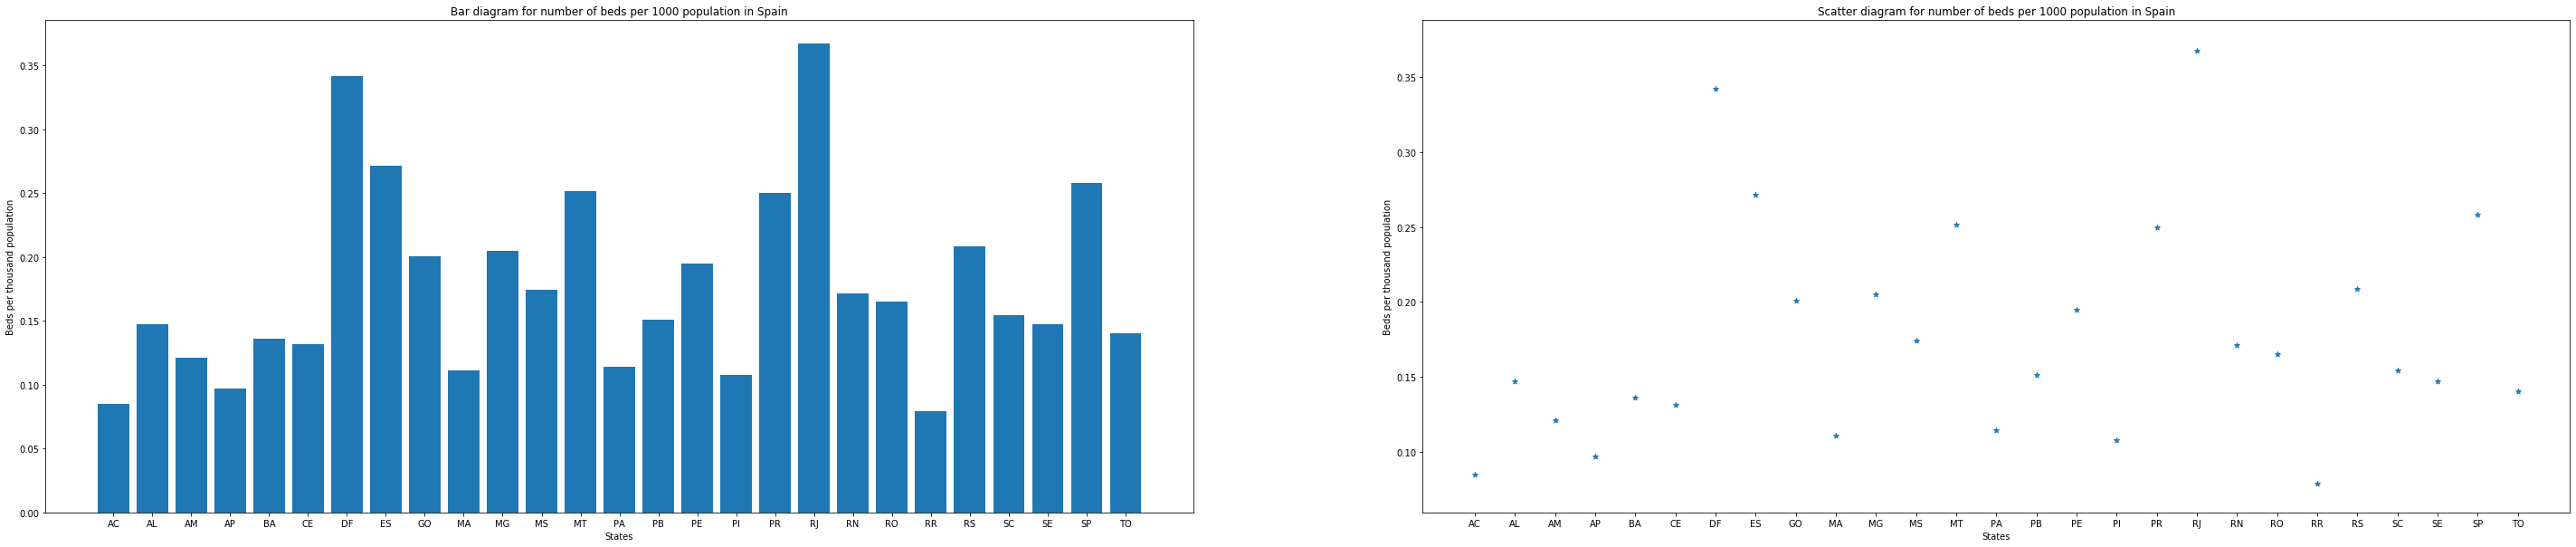

Enter K for K-means algorithm:4
The 4-means clusters are:
[['PA', 'RR', 'AC', 'AP', 'PI', 'MA', 'AM'], ['AL', 'CE', 'BA', 'TO', 'SE', 'PB', 'SC'], ['RN', 'RO', 'MS'], ['RS', 'PE', 'GO', 'MG', 'PR', 'MT', 'SP', 'ES', 'DF', 'RJ']]
The 4-means clusters by using scikit-learn are:
[['RR', 'AC', 'AP', 'PI', 'MA', 'PA', 'AM', 'CE', 'BA', 'TO'], ['AL', 'SE', 'PB', 'SC', 'RO', 'RN', 'MS', 'PE', 'GO', 'MG', 'RS'], ['PR', 'MT', 'SP', 'ES'], ['DF', 'RJ']]
Match percentage 70.085470%


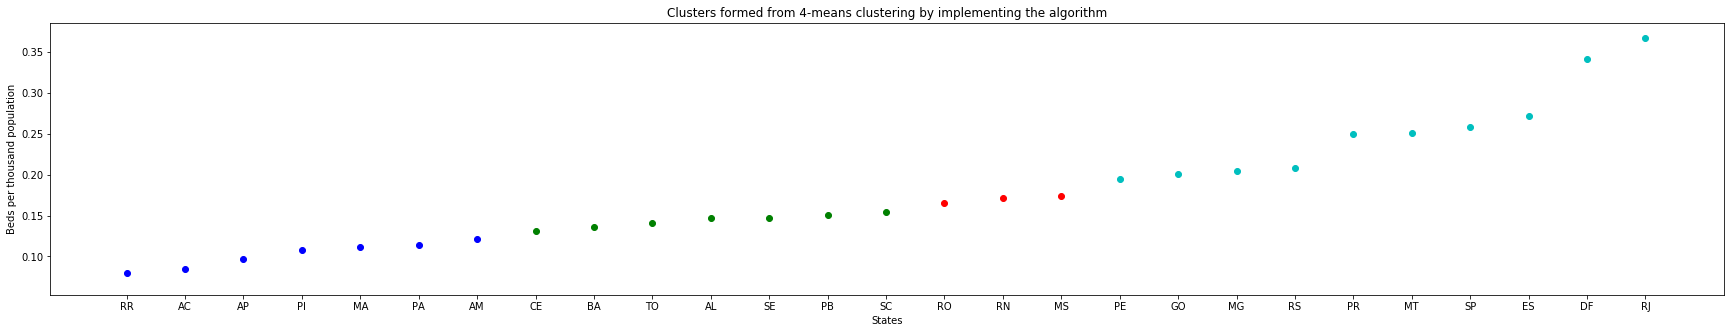

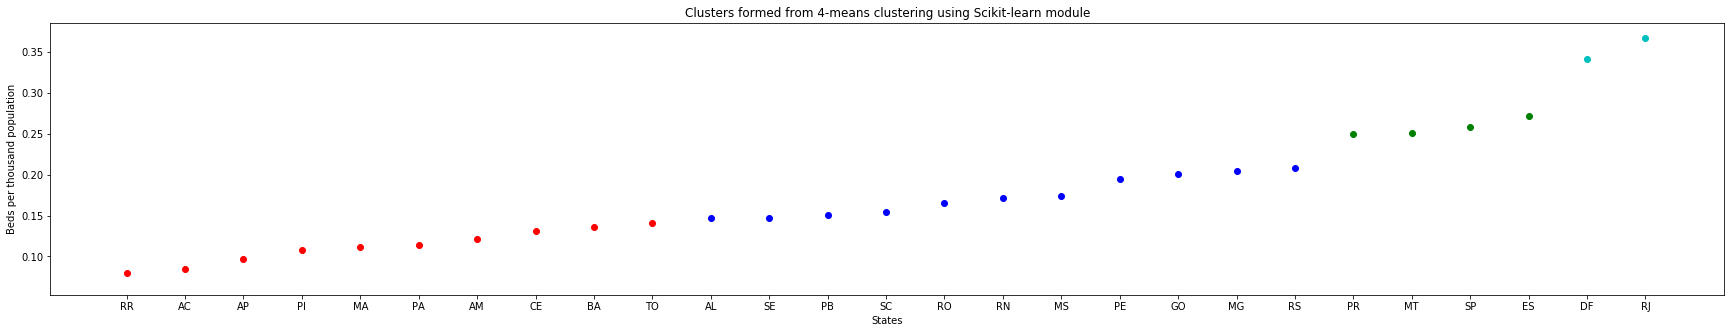

In [21]:
"""Brazilian Statewise ICU hospital beds extracted from IBGE datasets"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_ibge_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[1])
            y1.append(float(row[7]))
        r+=1
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="*")
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("States")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")


    

Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 70.09%

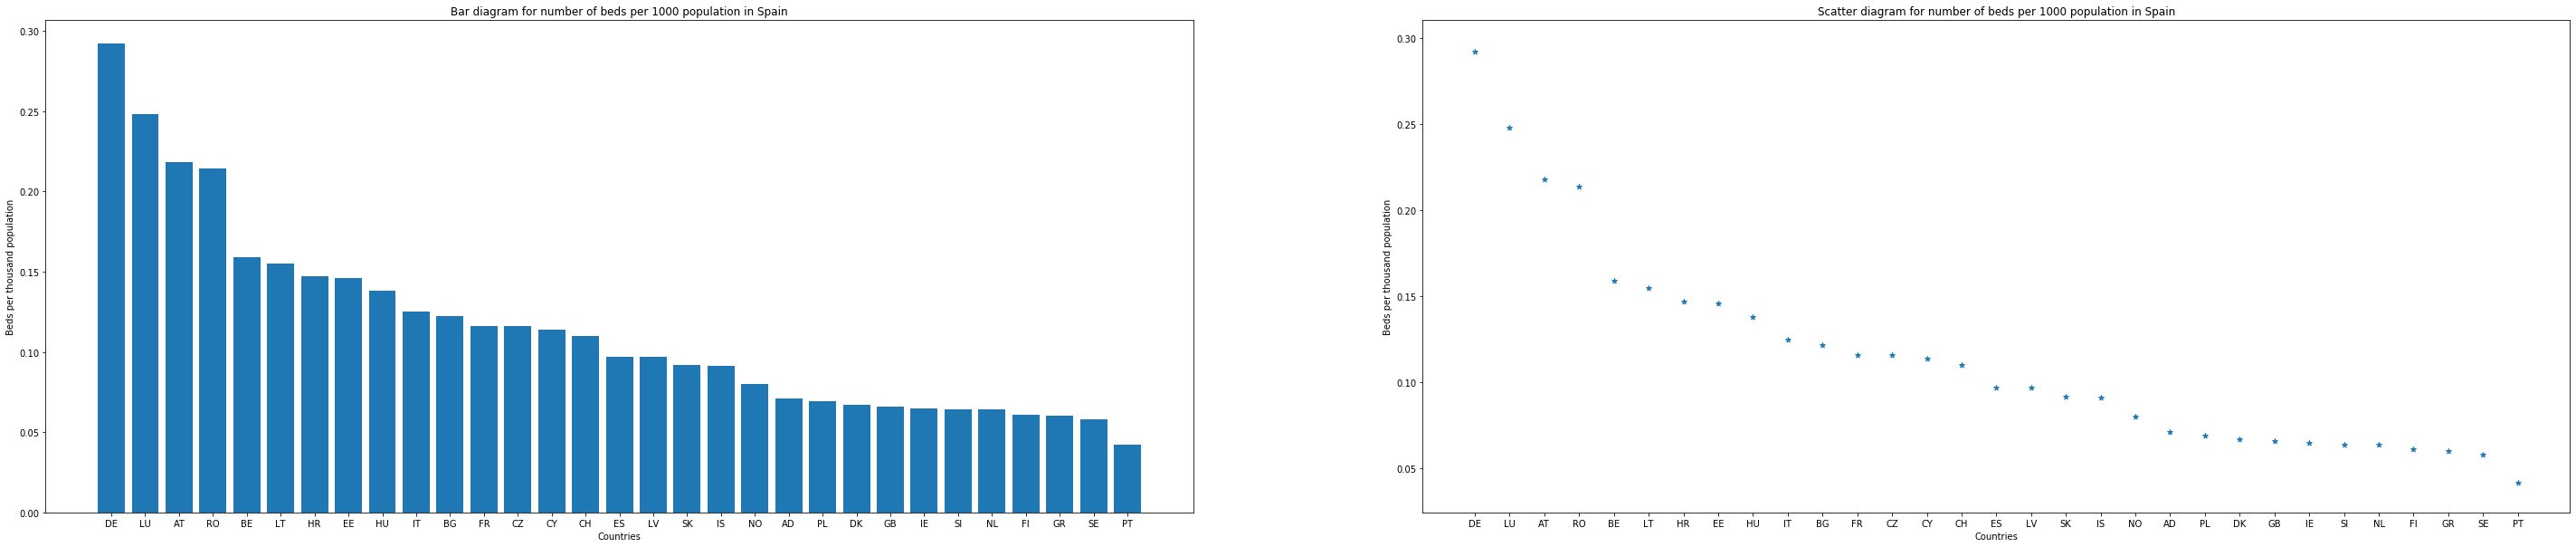

Enter K for K-means algorithm:4
The 4-means clusters are:
[['IE', 'PT', 'SE', 'GR', 'FI', 'SI', 'NL', 'GB', 'DK', 'PL', 'AD', 'NO'], ['IS', 'SK', 'ES', 'LV'], ['FR', 'CH', 'CY', 'CZ', 'BG', 'IT'], ['HR', 'HU', 'EE', 'LT', 'BE', 'RO', 'AT', 'LU', 'DE']]
The 4-means clusters by using scikit-learn are:
[['PT', 'SE', 'GR', 'FI', 'SI', 'NL', 'IE', 'GB', 'DK', 'PL', 'AD', 'NO'], ['IS', 'SK', 'ES', 'LV', 'CH', 'CY', 'FR', 'CZ', 'BG', 'IT'], ['HU', 'EE', 'HR', 'LT', 'BE'], ['RO', 'AT', 'LU', 'DE']]
Match percentage 90.537634%


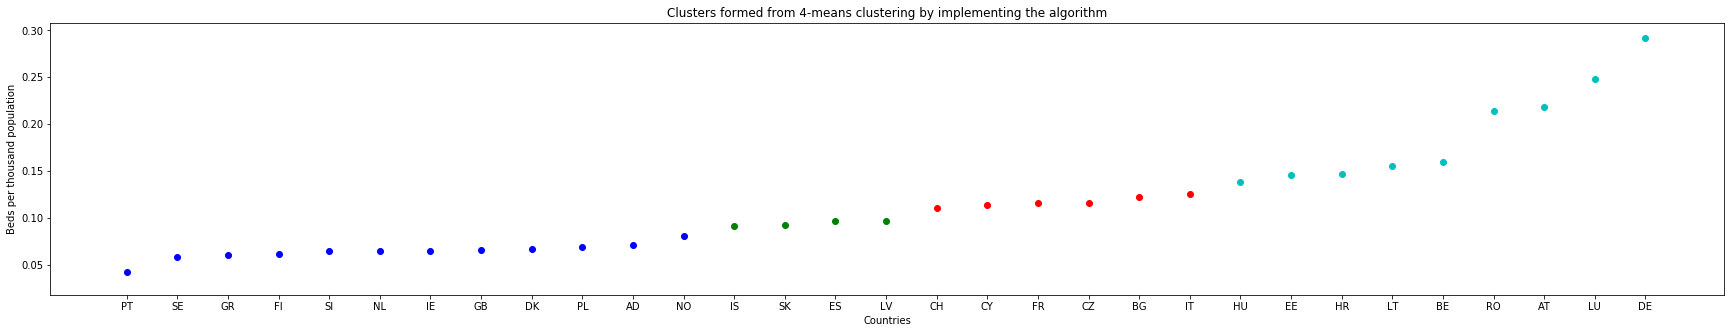

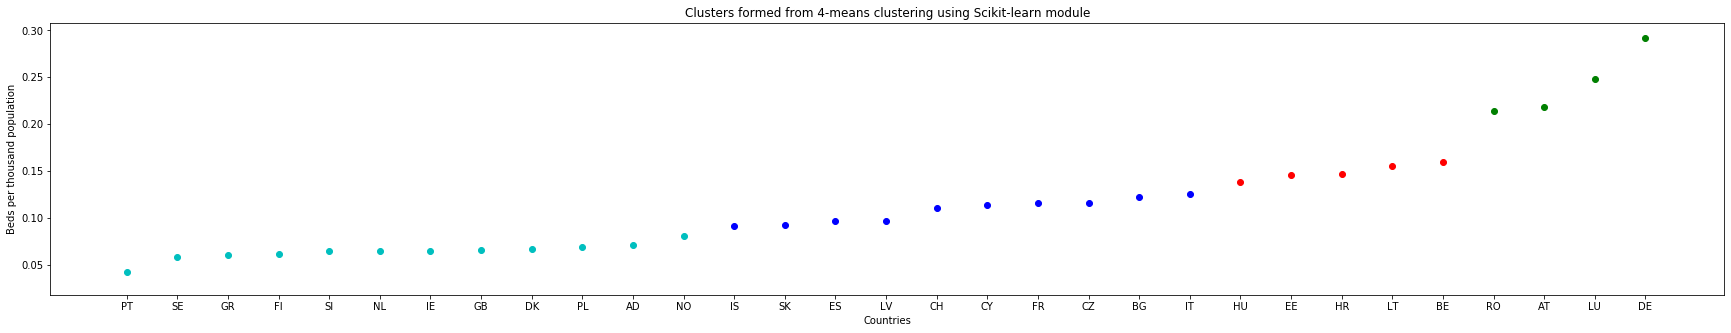

In [20]:
"""European countries hospital ICU beds extracted from ICM journal publication (2011)"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_icm_journal_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row:
            x1.append(row[0])
            y1.append(float(row[7]))
        r+=1
plt.figure(figsize=(50,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in Spain")
plt.subplot(122)
plt.scatter(x1,y1,marker="*")
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in Spain")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 90.54%

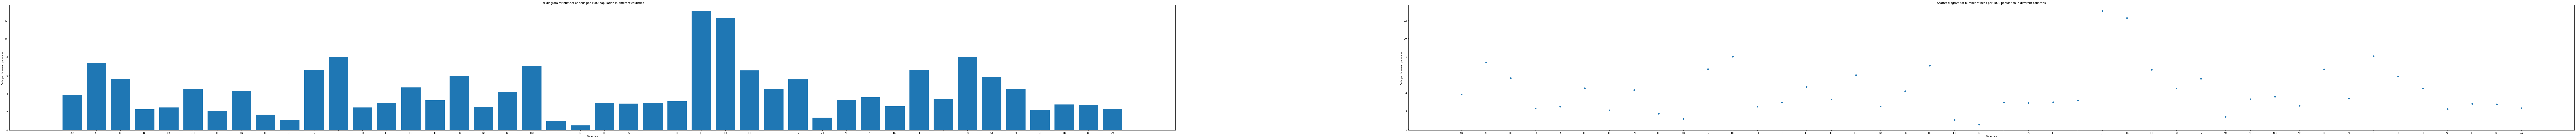

Enter K for K-means algorithm:4
The 4-means clusters are:
[['ZA', 'IN', 'ID', 'CR', 'MX', 'CO', 'CL', 'SE', 'BR', 'DK', 'CA', 'GB', 'NZ'], ['IE', 'US', 'TR', 'IS', 'ES', 'IL', 'IT', 'FI', 'NL', 'PT'], ['AU', 'NO', 'GR', 'CN', 'SI', 'LU', 'CH', 'EE'], ['BE', 'LV', 'SK', 'FR', 'LT', 'PL', 'CZ', 'HU', 'AT', 'DE', 'RU', 'KR', 'JP']]
The 4-means clusters by using scikit-learn are:
[['IN', 'ID', 'CR', 'MX', 'CO', 'CL', 'SE', 'BR', 'ZA', 'DK', 'CA', 'GB', 'NZ', 'US', 'TR', 'IS', 'IE', 'ES', 'IL'], ['IT', 'FI', 'NL', 'PT', 'NO', 'AU', 'GR', 'CN', 'SI', 'LU', 'CH', 'EE'], ['LV', 'BE', 'SK', 'FR', 'LT', 'PL', 'CZ', 'HU', 'AT', 'DE', 'RU'], ['KR', 'JP']]
Match percentage 83.509514%


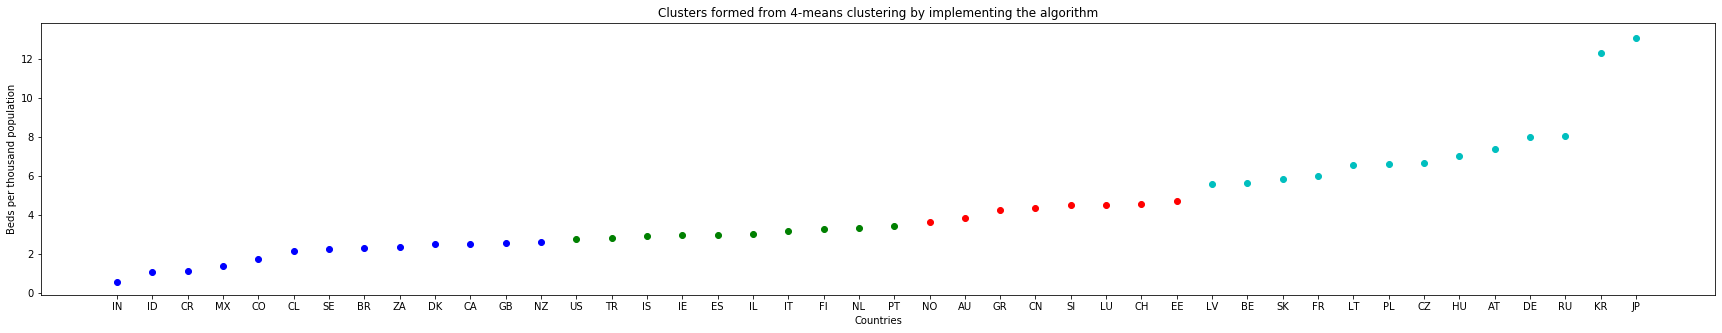

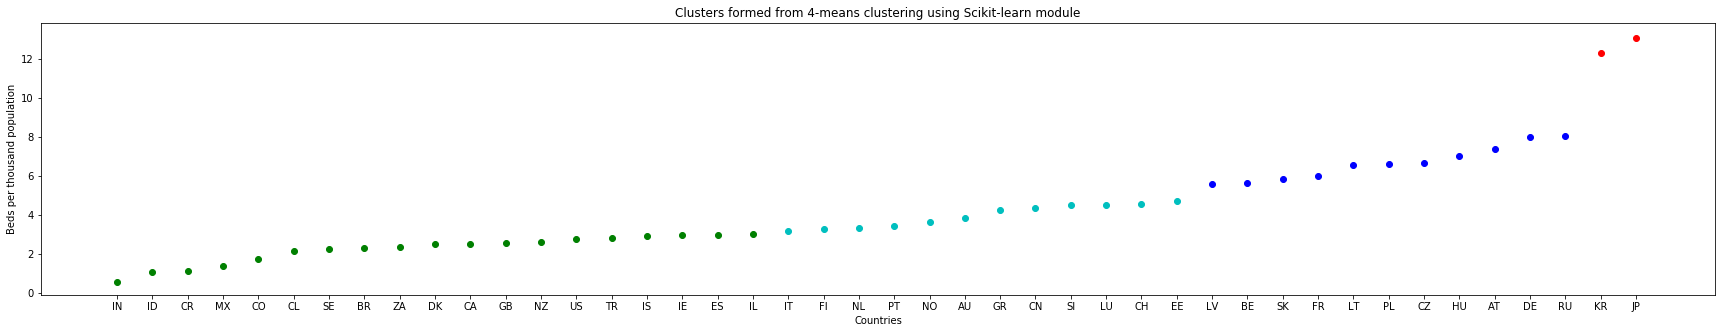

In [19]:
"""OECD countries TOTAL hospital beds from oecd.org services"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_oecd_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row and row[5]=="TOTAL":
            x1.append(row[0])
            y1.append(float(row[7]))
        r+=1
        
plt.figure(figsize=(200,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in different countries")
plt.subplot(122)
plt.scatter(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in different countries")
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 83.51%

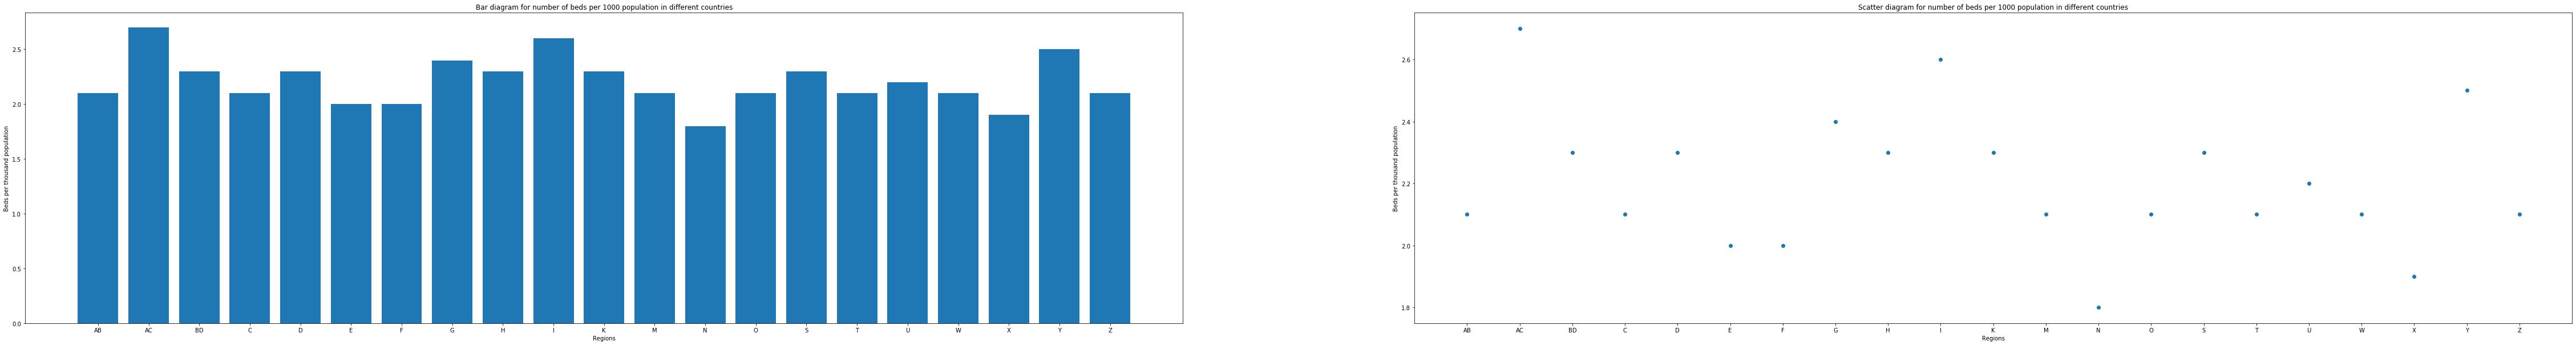

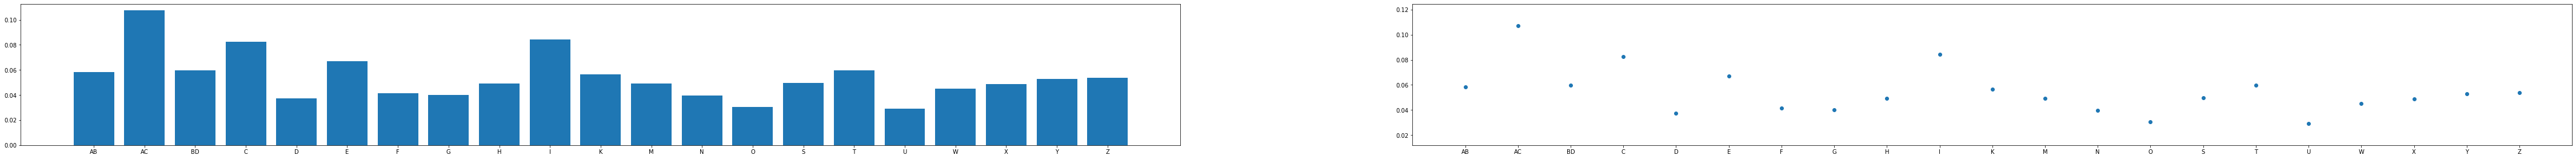

Enter K for K-means algorithm:4
The 4-means clusters are:
[['M', 'N', 'X', 'E', 'F'], ['W', 'M', 'AB', 'O', 'T', 'C', 'Z'], ['K', 'U'], ['S', 'K', 'BD', 'D', 'H', 'G', 'Y', 'I', 'AC']]
The 4-means clusters by using scikit-learn are:
[['N', 'X'], ['E', 'F', 'M', 'AB', 'O', 'T', 'W', 'C', 'Z'], ['U', 'K', 'BD', 'D', 'H', 'S', 'G'], ['Y', 'I', 'AC']]
Match percentage 76.666667%


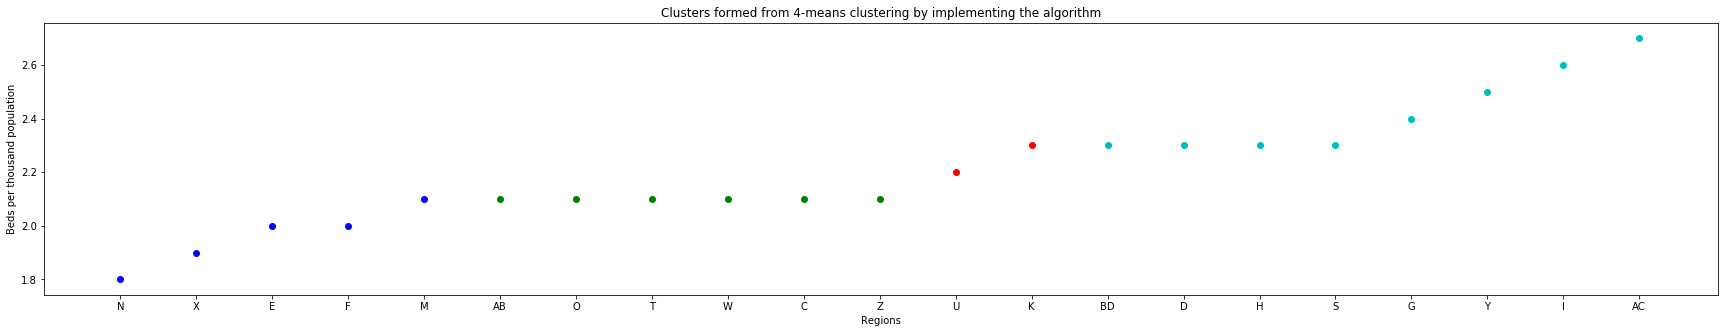

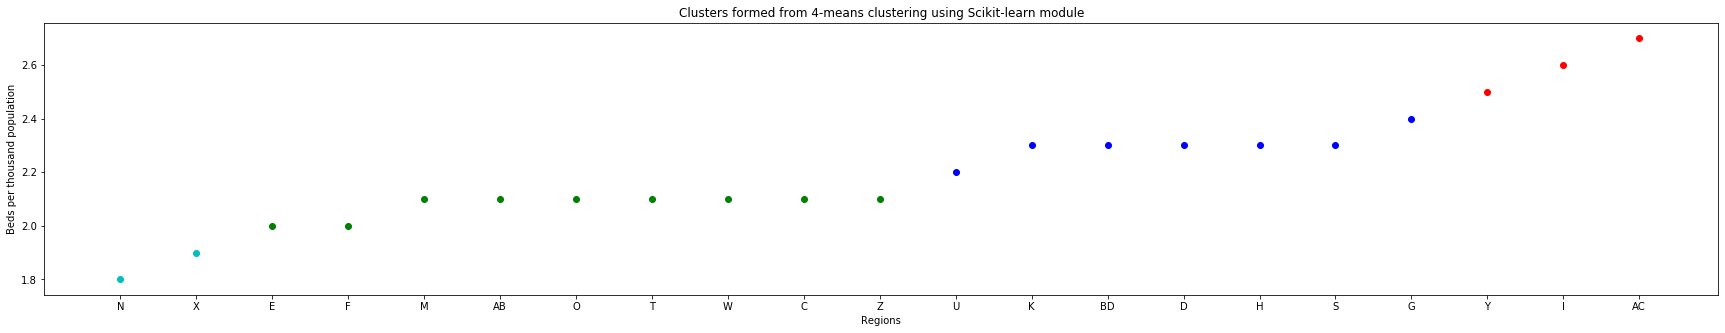

In [18]:
"""Swedish regionwise ICU(extracted from icuregswe.org as of 2019), TOTAL(extracted from vardenisiffror.se as for 2018) hospital beds"""
r=0
x1=[]
y1=[]
x2=[]
y2=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_sweden_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row and row[5]=="TOTAL":
            x1.append(row[1])
            y1.append(float(row[7]))
        elif r>0 and row and row[5]=="ICU":
            x2.append(row[1])
            y2.append(float(row[7]))
        r+=1
plt.figure(figsize=(80,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in different countries")
plt.subplot(122)
plt.scatter(x1,y1)
plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in different countries")
plt.figure(figsize=(80,10))
plt.subplot(221)
plt.bar(x2,y2)
plt.subplot(222)
plt.scatter(x2,y2)
plt.show() 




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(30,5))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(30,5))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Regions")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 76.67%

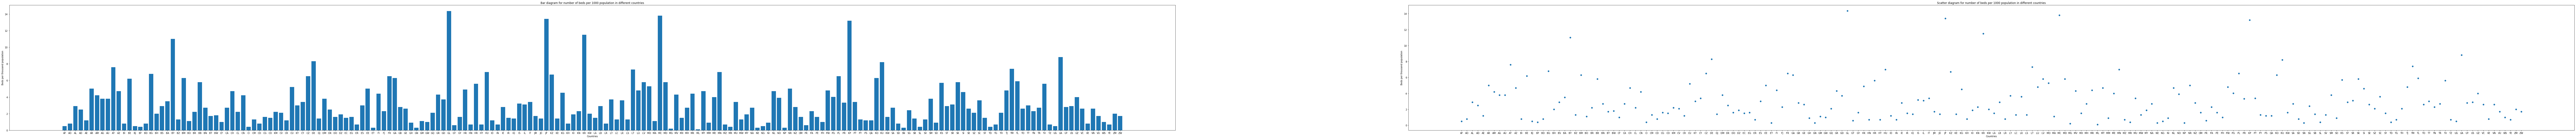

Enter K for K-means algorithm:10
The 10-means clusters are:
[['PK', 'ML', 'MG', 'ET', 'GN', 'NE', 'NP', 'SN', 'BF', 'CI', 'MR', 'SL', 'TD', 'BJ', 'NG', 'AF', 'UG', 'GT', 'MZ', 'HT', 'IN', 'ER', 'TG', 'TZ', 'HN', 'YE'], ['MM', 'BD', 'AO', 'KH', 'LR', 'CD', 'BI', 'VE', 'SD', 'SO', 'NI', 'GH', 'GW', 'PH', 'WS', 'CF', 'BO', 'MA', 'GM'], ['CM', 'AE', 'ID', 'PS', 'QA', 'CR', 'LS', 'BZ', 'MW', 'LC', 'SV', 'PY', 'JO', 'KE', 'DJ', 'IQ', 'SB'], ['EG', 'EC', 'LA', 'CO', 'MX', 'SY', 'IR', 'PE', 'DO', 'GY', 'CG', 'OM', 'RW', 'VU', 'JM', 'BT', 'ZW', 'BW'], ['BH', 'KI', 'MY', 'DZ', 'KW', 'ZM', 'GQ', 'CV', 'SZ', 'TH', 'CL', 'BR', 'KM', 'PA', 'FJ', 'KN', 'TN', 'SG'], ['VC', 'AD', 'DK', 'GE', 'TO', 'SE', 'VN', 'SA', 'TR', 'CA', 'MH', 'NA', 'BN'], ['LB', 'IE', 'NZ', 'GB', 'UY', 'ST', 'US', 'AL', 'BS', 'TT', 'ES', 'KY', 'IL', 'SR', 'IS', 'PR', 'MU', 'CY', 'IT', 'PT', 'BA', 'LK', 'SC'], ['DM', 'GD', 'LY', 'SM', 'AU', 'AG', 'NO', 'ME', 'UZ', 'PG', 'CN', 'AM', 'GR', 'MV', 'FI', 'MK', 'KG'], ['MT', 'SI', 'NL'

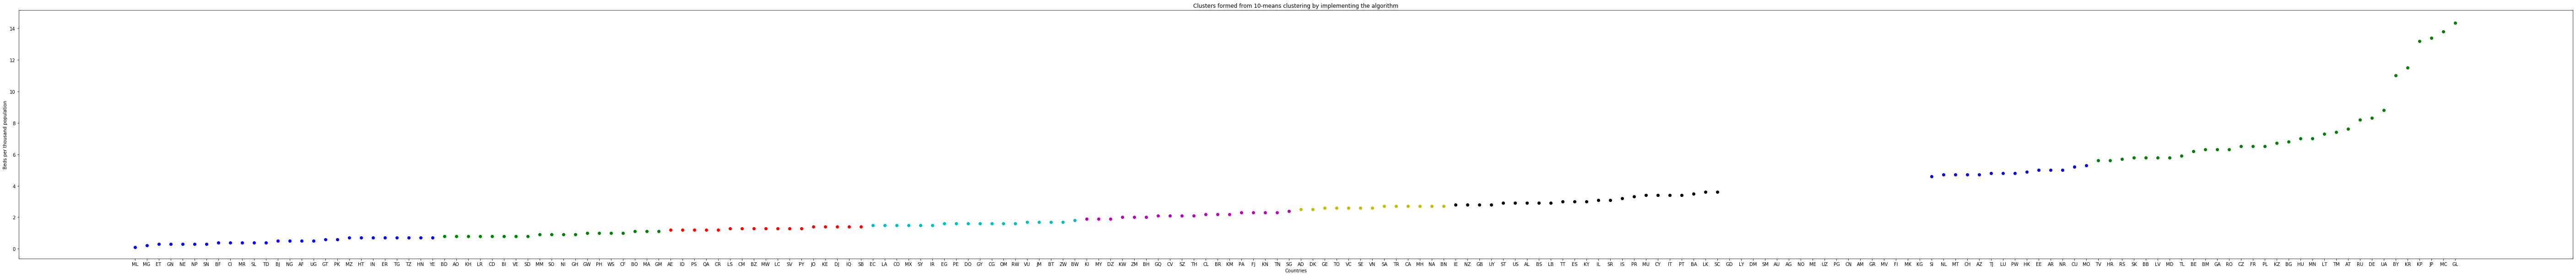

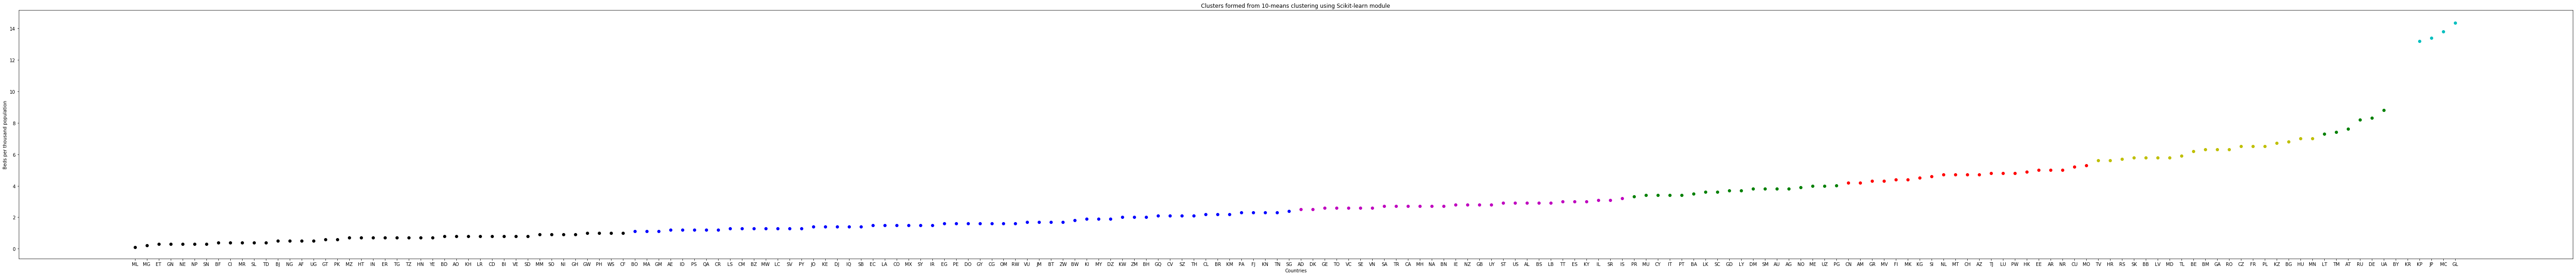

In [17]:
"""World countries hospital beds from World Development indicators extracted from worldbank.org"""
r=0
x1=[]
y1=[]
with open('D:\CoVid-19\Data\Hospital Beds\hospital_beds_per_wdi_v1.csv',mode="r") as csv_file:
    csv_reader=csv.reader(csv_file,delimiter=",")
    for row in csv_reader:
        if r>0 and row and row[5]=="TOTAL":
            x1.append(row[0])
            y1.append(float(row[7]))
        r+=1
plt.figure(figsize=(200,10))
plt.subplot(121)
plt.bar(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Bar diagram for number of beds per 1000 population in different countries")
plt.subplot(122)
plt.scatter(x1,y1)
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Scatter diagram for number of beds per 1000 population in different countries")
plt.show()




z=[]
z.append(x1)
z.append(y1)
for i in range(len(z[1])-1):
    for j in range(i+1,len(z[1])):
        if z[1][i]>z[1][j]:
            temp=z[1][i]
            z[1][i]=z[1][j]
            z[1][j]=temp
            temp1=z[0][i]
            z[0][i]=z[0][j]
            z[0][j]=temp1
k=int(input("Enter K for K-means algorithm:"))
m=int(len(z[0])/(k+1))
cluster=[]
centers=[]
for i in range(k):
    d={}
    d[z[0][(i+1)*m]]=z[1][(i+1)*m]
    centers.append(z[1][(i+1)*m])
    cluster.append(d)
for i in range(len(z[0])):
    mins=[]
    for j in range(k):
        diff=abs(centers[j]-z[1][i])
        mins.append(diff)
    mn=min(mins)
    for j in range(k):
        if mins[j]==mn:
            cluster[j][z[0][i]]=z[1][i]
            centers[j]=(centers[j]+z[1][i])/2
            break
cluster_areas=[]
cluster_areas_values=[]
for i in range(k):
    c=[]
    d=[]
    for j in cluster[i].keys():
        c.append(j)
    cluster_areas.append(c)
    for l in cluster[i].values():
        d.append(l)
    cluster_areas_values.append(d)
print("The %d-means clusters are:"%k)
print(cluster_areas)


colors=['b','g','r','c','m','y','k','w']
plt.figure(figsize=(100,10))
for state in x1:
    for i in range(k):
        if state in cluster_areas[i]:
            for j in range(len(cluster_areas[i])):
                if state==cluster_areas[i][j]:
                    single_state=[state]
                    single_value=[cluster_areas_values[i][j]]
                    plt.scatter(single_state,single_value,c=colors[i%8])
                    break
            break
            
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering by implementing the algorithm"%k)

            
            
arr=np.array(y1)
arr.resize(arr.shape[0],1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(arr)
klabels=kmeans.labels_
cluster_areas_sklearn=[]
l=[]
for i in range(len(x1)):
    if i==0:
        l.append(x1[i])
    elif 0<i<len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
    if i==len(x1)-1:
        if klabels[i-1]==klabels[i]:
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
        else:
            cluster_areas_sklearn.append(l)
            l=[]
            l.append(x1[i])
            cluster_areas_sklearn.append(l)
print("The %d-means clusters by using scikit-learn are:"%(k))
print(cluster_areas_sklearn)
plt.figure(figsize=(100,10))
for i in range(len(x1)):
    state=[x1[i]]
    value=[y1[i]]
    col=klabels[i]
    plt.scatter(state,value,c=colors[col%8])
plt.xlabel("Countries")
plt.ylabel("Beds per thousand population")
plt.title("Clusters formed from %d-means clustering using Scikit-learn module"%k) 


data={}
for s in range(len(x1)-1):
    l=[]
    for i in range(k):
        if x1[s] in cluster_areas[i]:
            break
    dic={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas[i]:
            dic[x1[t]]="Same"
        else:
            dic[x1[t]]="Different"
    l.append(dic)
    for j in range(k):
        if x1[s] in cluster_areas_sklearn[j]:
            break
    dic1={}
    for t in range(s+1,len(x1)):
        if x1[t] in cluster_areas_sklearn[j]:
            dic1[x1[t]]="Same"
        else:
            dic1[x1[t]]="Different"
    l.append(dic1)
    data[x1[s]]=l
perfectness=[]
for i in data.keys():
    p=0
    for j in data[i][0].keys():
        if data[i][0][j]==data[i][1][j]:
            p+=1
    perfectness.append(p)

s=(len(x1)*(len(x1)-1))/2
result=float(sum(perfectness)/s)
print("Match percentage %f"%(result*100)+"%")



Comment: The percentage of match of clusters between implementing K-means algorithm and implementing the same using Scikit-learn for the above dataset is 90.97%